# Laboratorio Clustering


### Contexto del Problema

Eres un científico de datos contratado por una federación deportiva internacional que desea mejorar sus programas de entrenamiento personalizados. La federación maneja una gran variedad de atletas que participan en diferentes disciplinas deportivas, y cada uno tiene necesidades de entrenamiento y desarrollo únicas. Para maximizar el rendimiento y mejorar la efectividad de los programas de entrenamiento, la federación quiere segmentar a sus atletas en grupos homogéneos basados en sus características físicas, habilidades y comportamientos de entrenamiento.


### Los datos

- **name**: Nombre del atleta. Es una variable categórica que identifica a cada atleta de manera única.

- **gender**: Género del atleta. Es una variable categórica que indica si el atleta es masculino ("Male") o femenino ("Female").

- **age**: Edad del atleta. Es una variable numérica que representa la edad del atleta en años.

- **height**: Altura del atleta. Es una variable numérica que representa la altura del atleta en centímetros.

- **nationality**: Nacionalidad del atleta. Es una variable categórica que indica el país de origen del atleta.

- **weight**: Peso del atleta. Es una variable numérica que representa el peso del atleta en kilogramos.

- **sports**: Deportes que practica el atleta. Es una variable categórica que puede contener múltiples valores (deportes) separados por comas.

- **hours_per_day**: Horas de entrenamiento por día. Es una variable numérica que indica el número promedio de horas que el atleta entrena cada día.

- **strength**: Fuerza del atleta. Es una variable numérica que representa la evaluación de la fuerza del atleta en una escala (por ejemplo, de 1 a 10).

- **agility**: Agilidad del atleta. Es una variable numérica que representa la evaluación de la agilidad del atleta en una escala (por ejemplo, de 1 a 10).

- **mental**: Capacidad mental del atleta. Es una variable numérica que representa la evaluación de la capacidad mental del atleta en una escala (por ejemplo, de 1 a 10).

- **federation**: Federación a la que pertenece el atleta. Es una variable categórica que indica la organización deportiva a la que está afiliado el atleta.

- **year_start**: Año de inicio. Es una variable numérica que indica el año en que el atleta comenzó su carrera o se unió a la federación.

- **rank**: Rango del atleta. Es una variable numérica que representa la posición o clasificación del atleta en su disciplina o federación.


### Objetivo del Ejercicio

El objetivo principal de este ejercicio es que los alumnos practiquen y desarrollen habilidades en el análisis de datos, preprocesamiento y técnicas de clustering aplicadas a un problema real en el ámbito deportivo. Al completar este ejercicio, los alumnos deberán ser capaces de:

1. **Realizar un Análisis Exploratorio de Datos (EDA)**:
    - Comprender la estructura y distribución de los datos.
    - Identificar patrones y relaciones significativas entre las variables.
    - Manejar valores faltantes y atípicos de manera efectiva.
    - Visualizar las características más relevantes.

2. **Preprocesar los Datos de Manera Adecuada**:
    - Convertir variables categóricas en variables numéricas.
    - Escalar las variables numéricas para asegurar una contribución equitativa al análisis de clustering.
    - Seleccionar las características más relevantes que contribuirán al análisis de clustering.

3. **Aplicar Técnicas de Clustering para Segmentar a los Atletas**:
    - Probar diferentes métodos de clustering (e.g., K-means, DBSCAN, Hierarchical Clustering) para identificar el más adecuado para los datos proporcionados.
    - Determinar el número óptimo de clusters utilizando métodos como el codo (Elbow Method) o la silueta (Silhouette Score).
    - Visualizar los clusters obtenidos y analizar sus características distintivas.

4. **Extraer Conclusiones y Proporcionar Recomendaciones de Entrenamiento**:
    - Describir las características principales de cada cluster identificado.
    - Proporcionar recomendaciones prácticas y accionables para personalizar los programas de entrenamiento para cada grupo de atletas.
¡

In [42]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

import sys
sys.path.append("../")

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import math


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Importar nuestro archivo de soporte
# -----------------------------------------------------------------------
from src import soporte_clustering as sc

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
# abrimos el conjunto de datos
df = pd.read_csv("../data/WrestlingWorldTournament.csv", index_col=0).reset_index(drop=True)

In [44]:
df.drop(columns=["name","federation"], inplace=True)

In [45]:
df.head()

gender  age  height nationality  weight       sports  hours_per_day  \
0  Female   41   165.0     England      82  Boxing, MMA              3   
1    Male   36   185.0       Japan     100         Judo              0   
2    Male   29   178.5       Japan      93       Karate              4   
3    Male   39   187.5       Japan     107         Judo              3   
4  Female   29   158.0         USA      72          MMA              1   

   strength  agility  mental  year_start  rank  
0         7        8       7        1989    42  
1         8        5       9        2006   161  
2         8        8       7        2012   153  
3         7        6       8        2003   252  
4         5        7       7        2012   360

In [46]:
# instanciamos la clase de Exploración de datos antes de aplicar el algoritmo
preprocesar = sc.Exploracion(df)

# llamamos al método de exploración de datos
preprocesar.explorar_datos()

5 registros aleatorios:


gender  age  height nationality  weight        sports  hours_per_day  \
369  Female   30   173.0   Australia      88   Karate, MMA              4   
105    Male   36   171.0       Japan      86        Karate              1   
426    Male   26   192.5       Japan     111  Judo, Karate              2   
331  Female   30   167.0      France      81          Judo              2   
129  Female   30   175.5   Australia      90          Judo              2   

     strength  agility  mental  year_start  rank  
369         4        8       7        2008   258  
105         7        5       7        1999   366  
426         6        5       6        2013   457  
331         5        8       6        2009   370  
129         5        8       4        2010   487



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         500 non-null    object 
 1   age            500 non-null    int64  
 2   height         500 non-null    float64
 3   nationality    500 non-null    object 
 4   weight         500 non-null    int64  
 5   sports         500 non-null    object 
 6   hours_per_day  500 non-null    int64  
 7   strength       500 non-null    int64  
 8   agility        500 non-null    int64  
 9   mental         500 non-null    int64  
 10  year_start     500 non-null    int64  
 11  rank           500 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 47.0+ KB
None


Duplicados en el DataFrame:
0


Estadísticas descriptivas de las columnas numéricas:


count      mean         std     min      25%     50%       75%  \
age            500.0    31.154    5.438514    18.0    27.00    31.0    35.000   
height         500.0   174.864    9.468623   152.0   167.50   174.0   181.625   
weight         500.0    89.688   11.081889    65.0    81.00    89.0    98.000   
hours_per_day  500.0     3.064    1.375386     0.0     2.00     3.0     4.000   
strength       500.0     6.152    1.567741     2.0     5.00     6.0     7.000   
agility        500.0     7.148    1.455449     3.0     6.00     7.0     8.000   
mental         500.0     6.732    1.197934     3.0     6.00     7.0     8.000   
year_start     500.0  2007.130    6.325910  1986.0  2003.00  2007.0  2011.000   
rank           500.0   250.500  144.481833     1.0   125.75   250.5   375.250   

                  max  
age              53.0  
height          202.0  
weight          123.0  
hours_per_day     8.0  
strength         10.0  
agility          10.0  
mental           10.0  
year_start     2021.0  
rank            500.0



Estadísticas descriptivas de las columnas categóricas:


count unique     top freq
gender        500      2  Female  265
nationality   500      8  France  118
sports        500     31  Karate   42



Número de valores nulos por columna:
gender           0
age              0
height           0
nationality      0
weight           0
sports           0
hours_per_day    0
strength         0
agility          0
mental           0
year_start       0
rank             0
dtype: int64


Distribución de valores categóricos:

Columna: gender
gender
Female    265
Male      235
Name: count, dtype: int64

Columna: nationality
nationality
France       118
Japan        116
USA          115
Australia     64
Egypt         42
England       26
Argentina     12
India          7
Name: count, dtype: int64

Columna: sports
sports
Karate                                    42
MMA                                       34
Boxing                                    33
Boxing, MMA                               31
Judo                                      29
Boxing, Karate                            26
Kick-Boxing, MMA                          22
Boxing, Kick-Boxing, MMA                  21
Boxing, Kick-Boxing    

age    height    weight  hours_per_day  strength  \
age            1.000000 -0.001694  0.044624      -0.003731  0.016052   
height        -0.001694  1.000000  0.982154       0.072840  0.658785   
weight         0.044624  0.982154  1.000000       0.071260  0.654799   
hours_per_day -0.003731  0.072840  0.071260       1.000000 -0.025897   
strength       0.016052  0.658785  0.654799      -0.025897  1.000000   
agility       -0.036051 -0.484157 -0.486668       0.326623 -0.384900   
mental         0.219514  0.144129  0.157628       0.275585  0.116703   
year_start    -0.858723  0.005482 -0.039413      -0.136393  0.017604   
rank          -0.208136 -0.251894 -0.257785      -0.458479 -0.383859   

                agility    mental  year_start      rank  
age           -0.036051  0.219514   -0.858723 -0.208136  
height        -0.484157  0.144129    0.005482 -0.251894  
weight        -0.486668  0.157628   -0.039413 -0.257785  
hours_per_day  0.326623  0.275585   -0.136393 -0.458479  
strength      -0.384900  0.116703    0.017604 -0.383859  
agility        1.000000 -0.005940   -0.054115 -0.343249  
mental        -0.005940  1.000000   -0.218854 -0.423994  
year_start    -0.054115 -0.218854    1.000000  0.323980  
rank          -0.343249 -0.423994    0.323980  1.000000

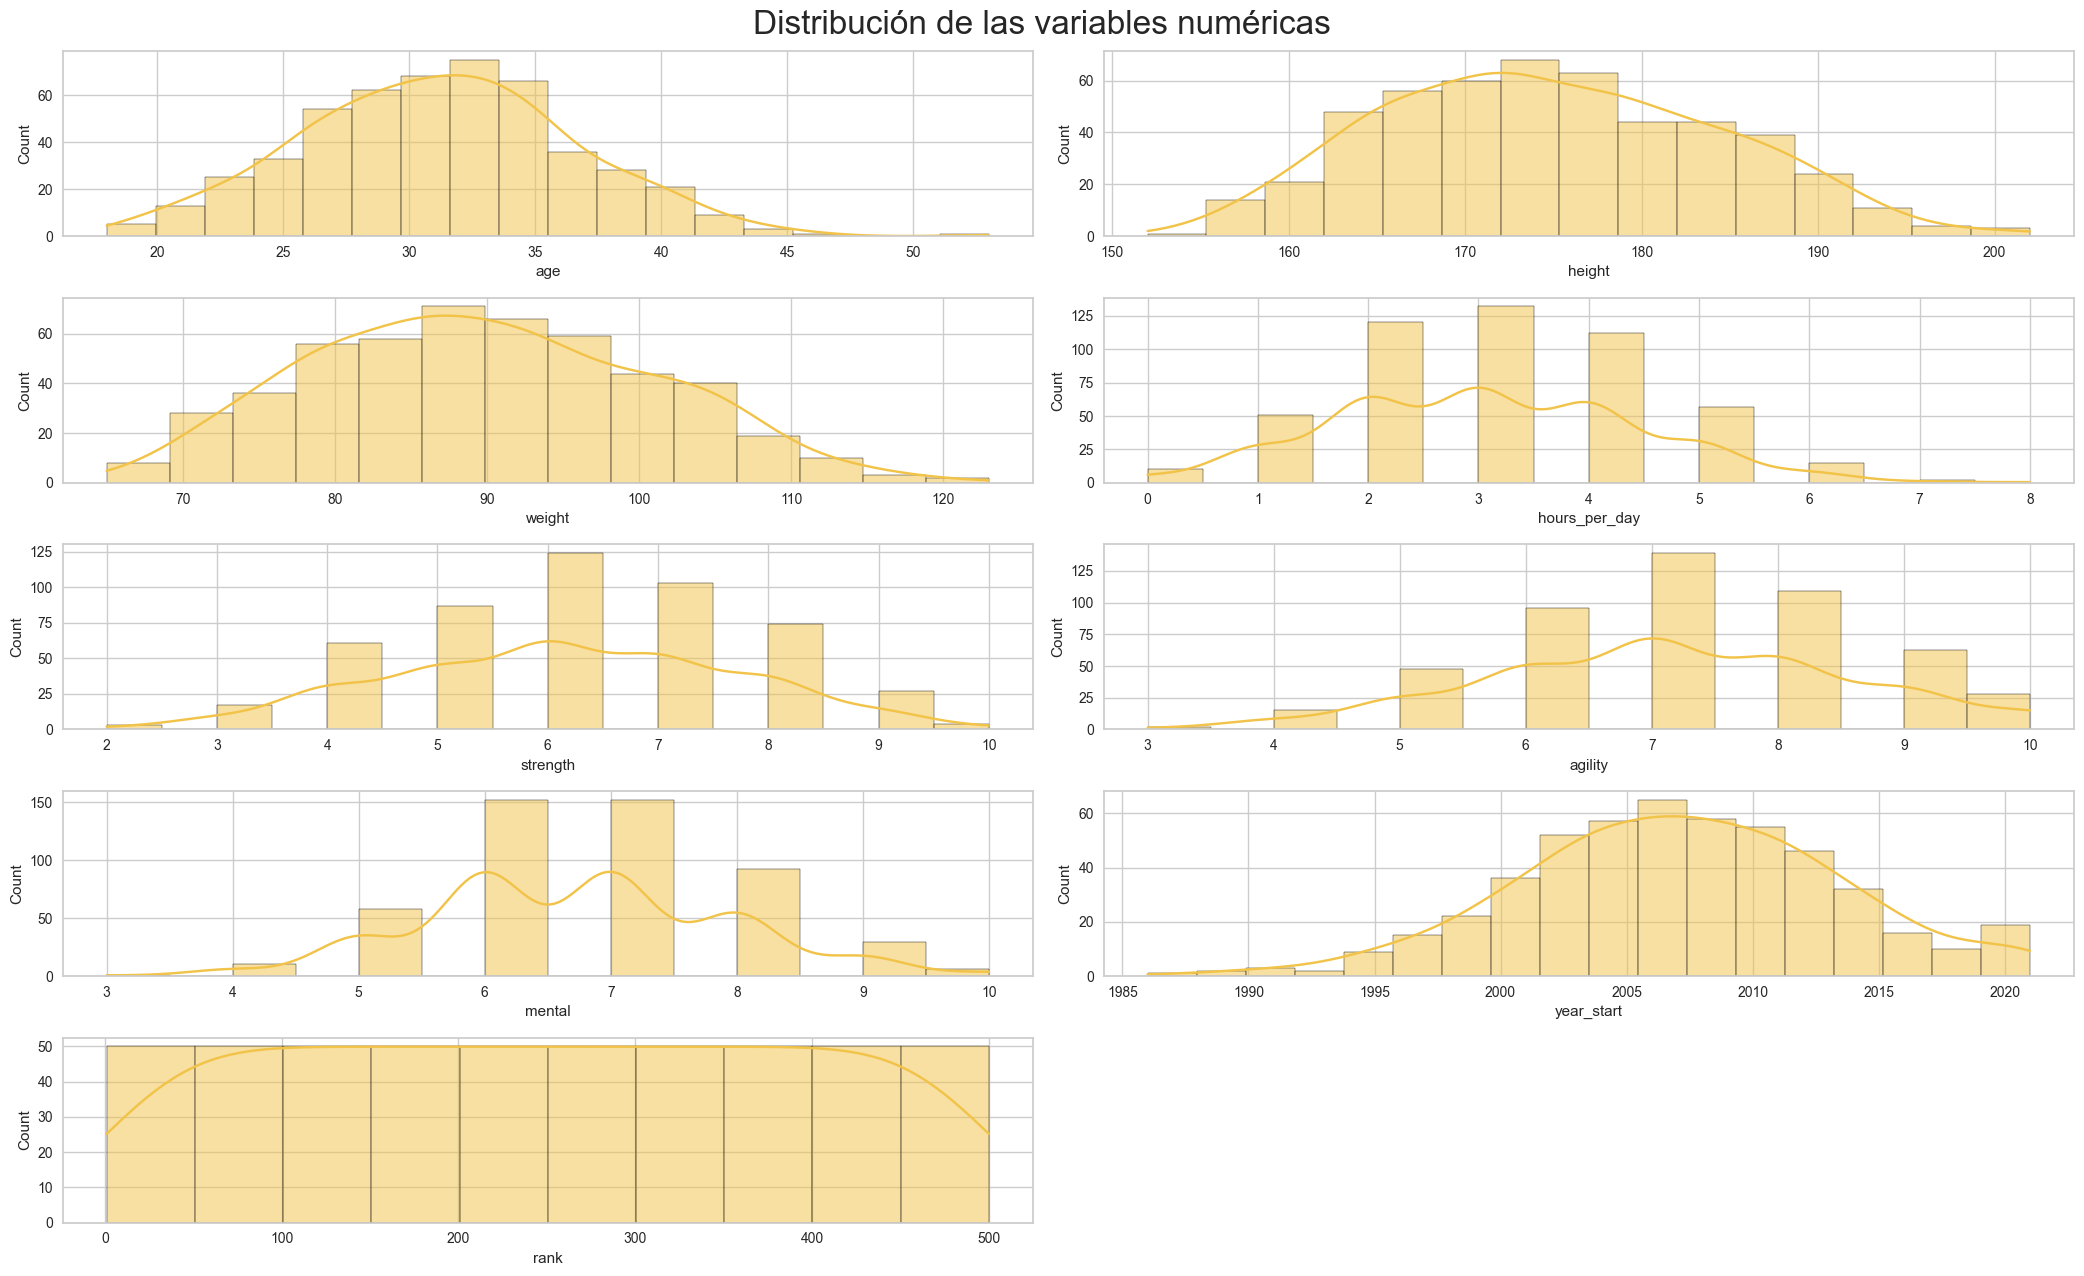

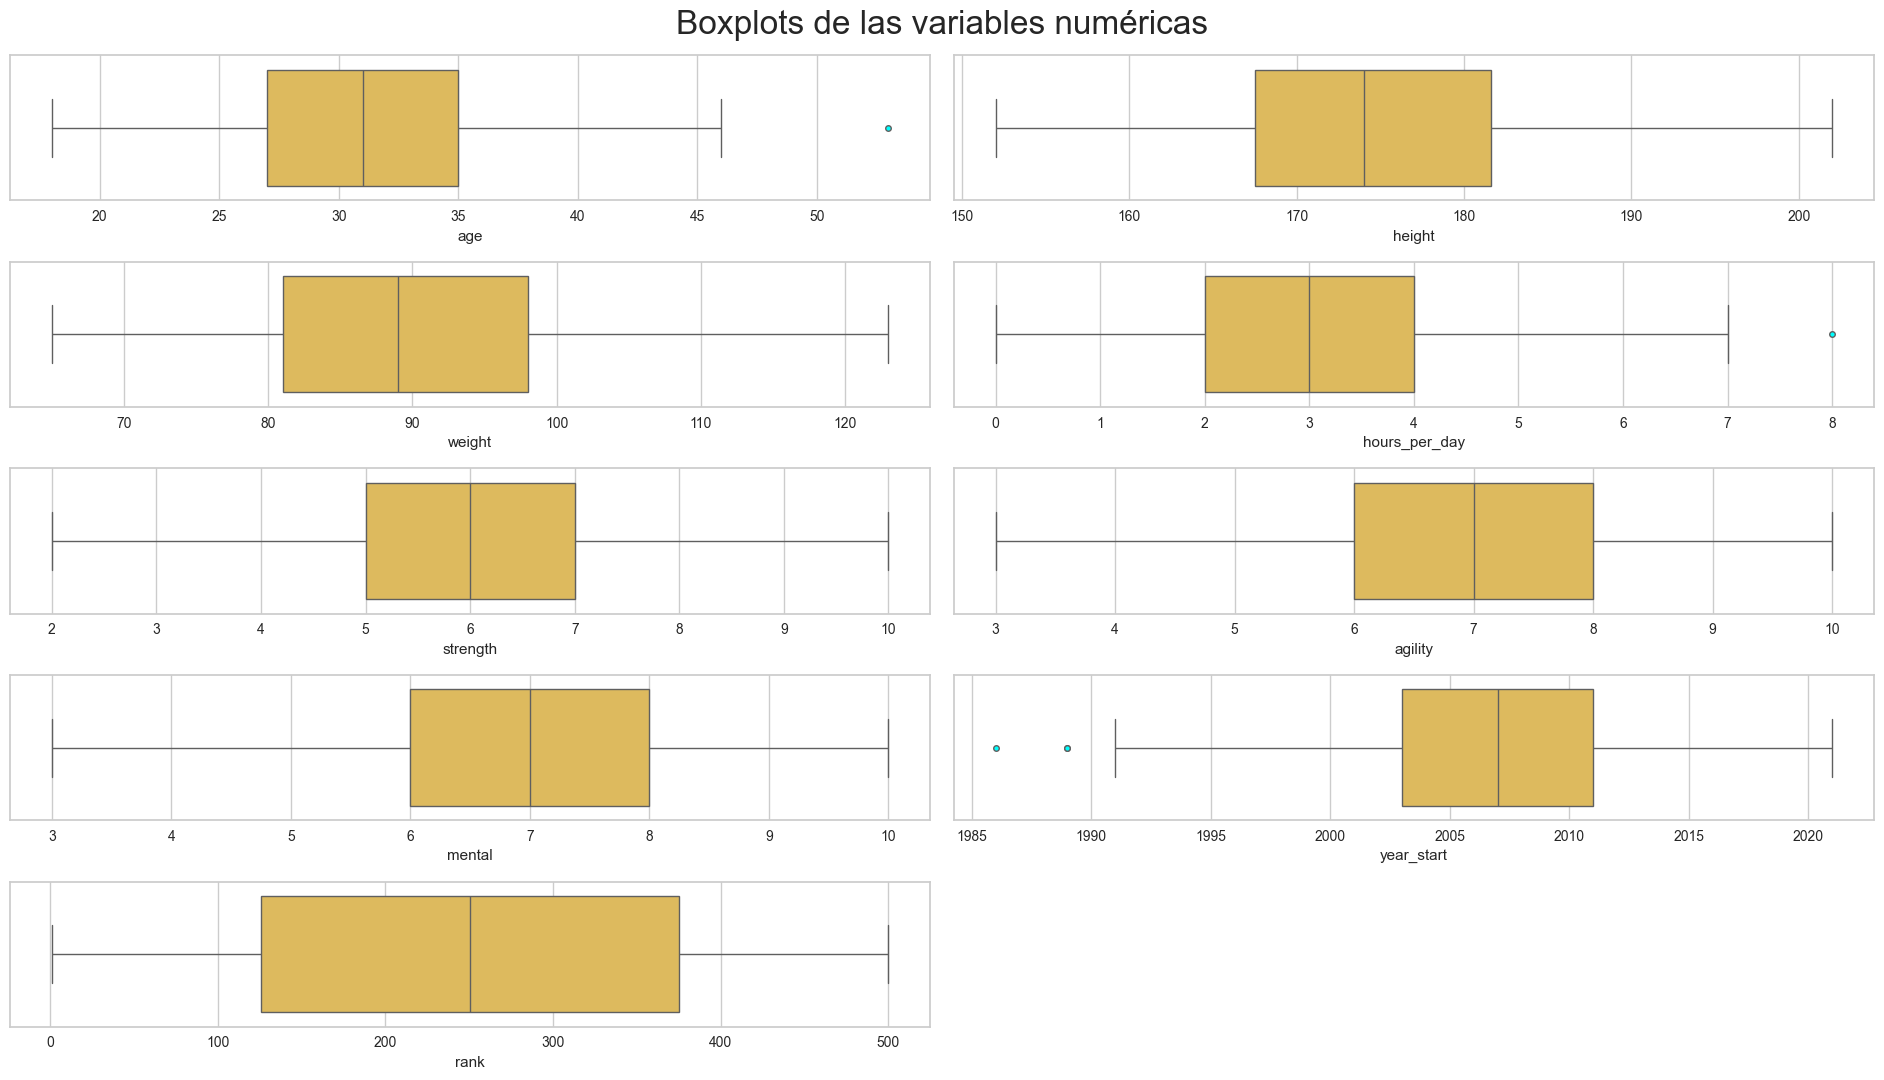

In [47]:
preprocesar.visualizar_numericas()

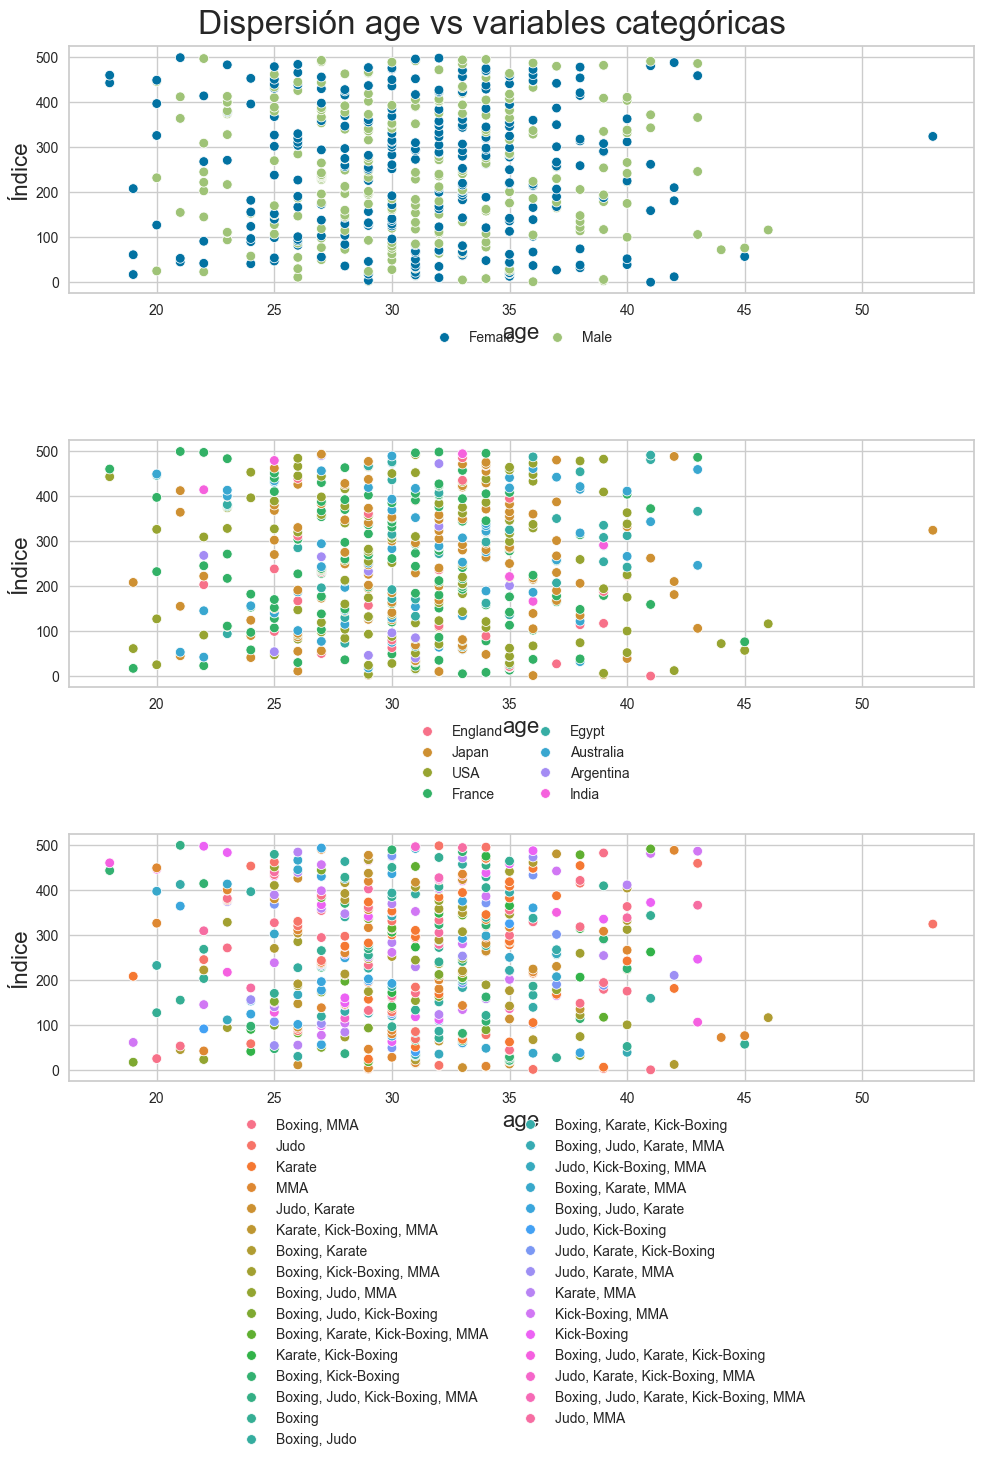

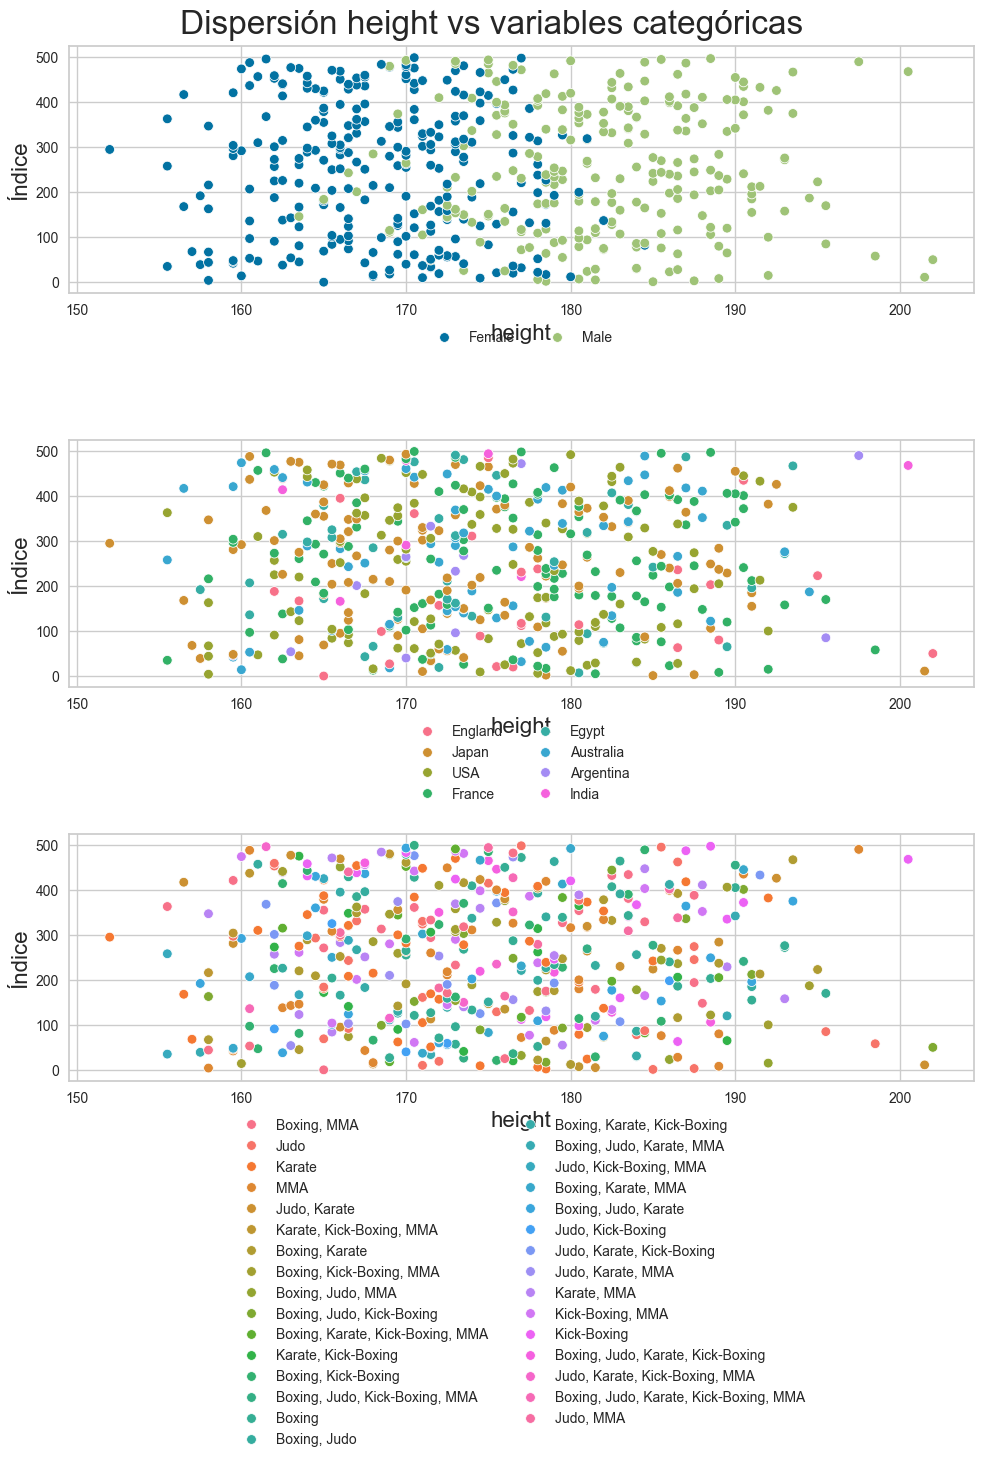

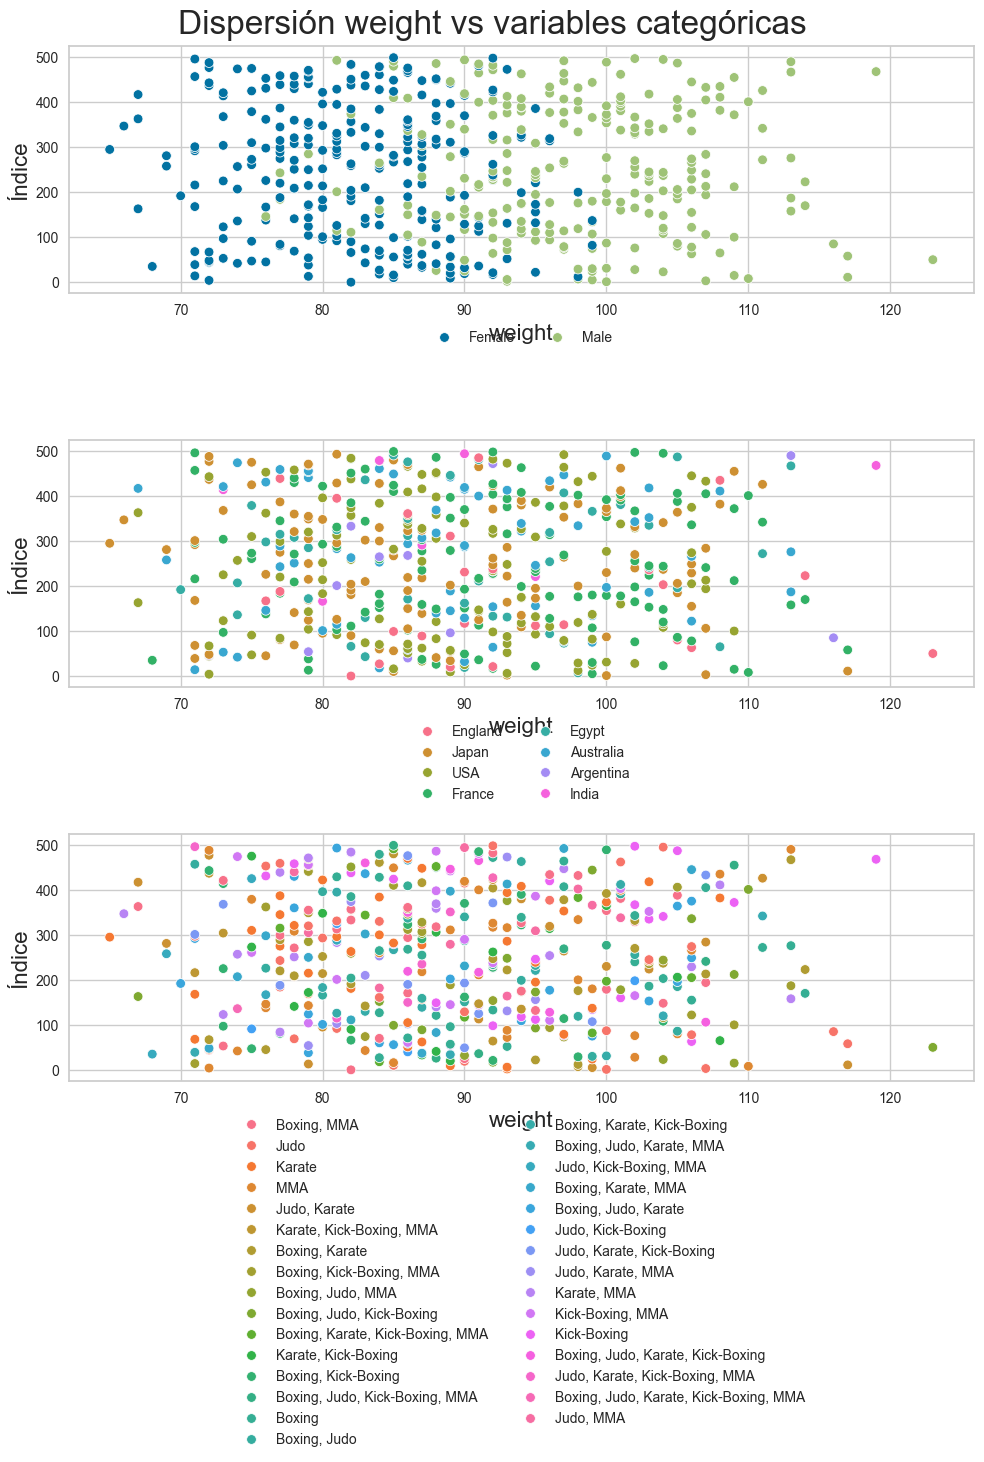

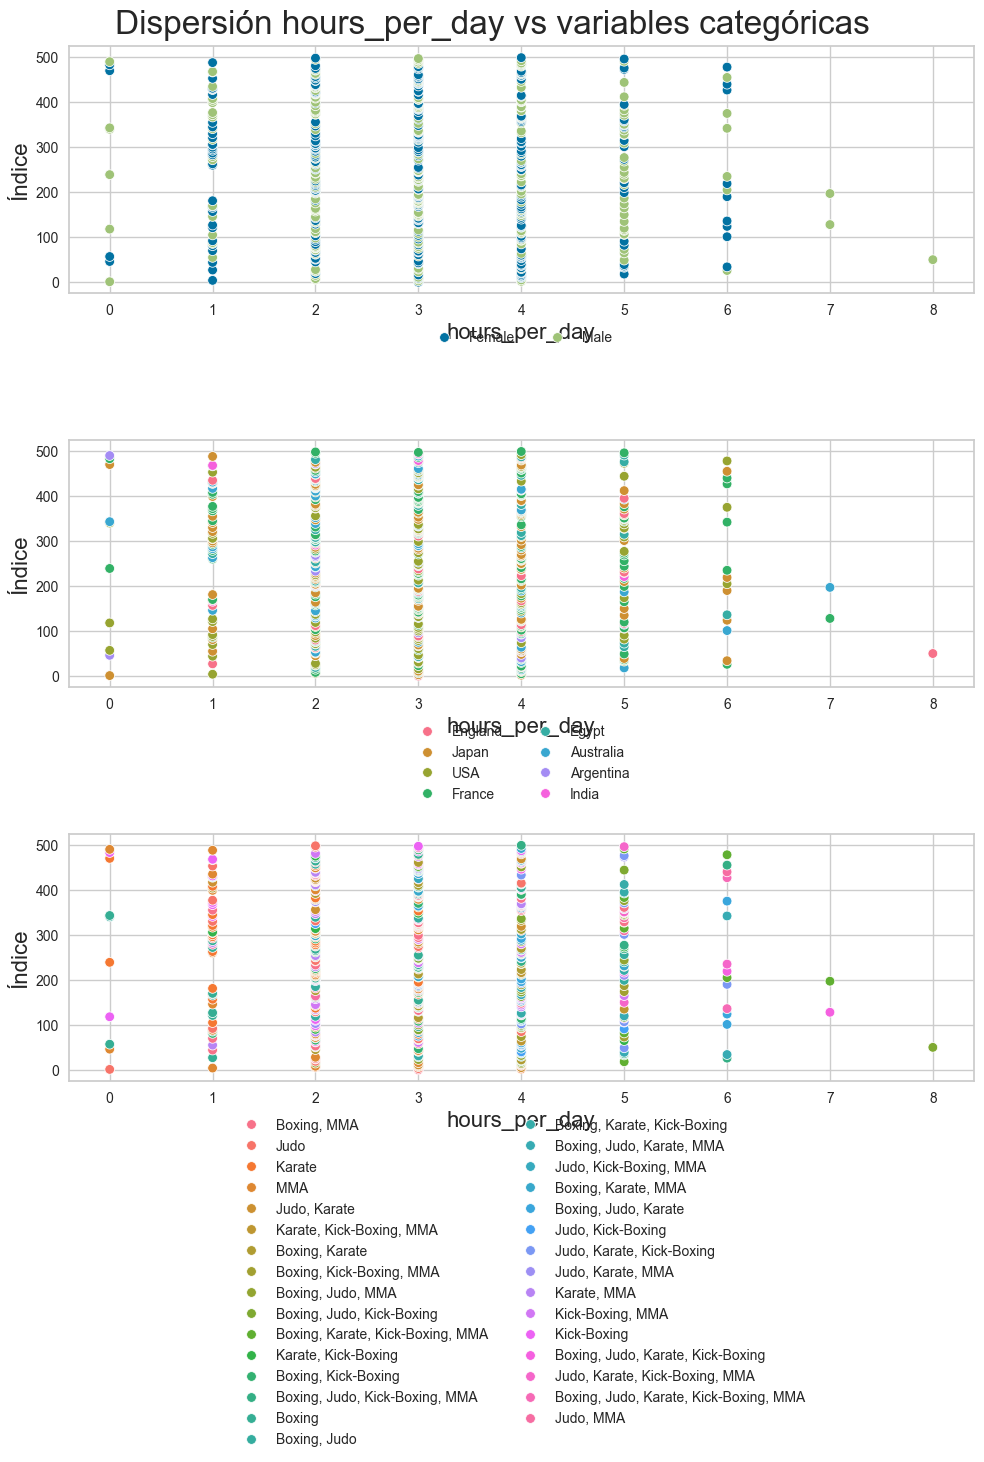

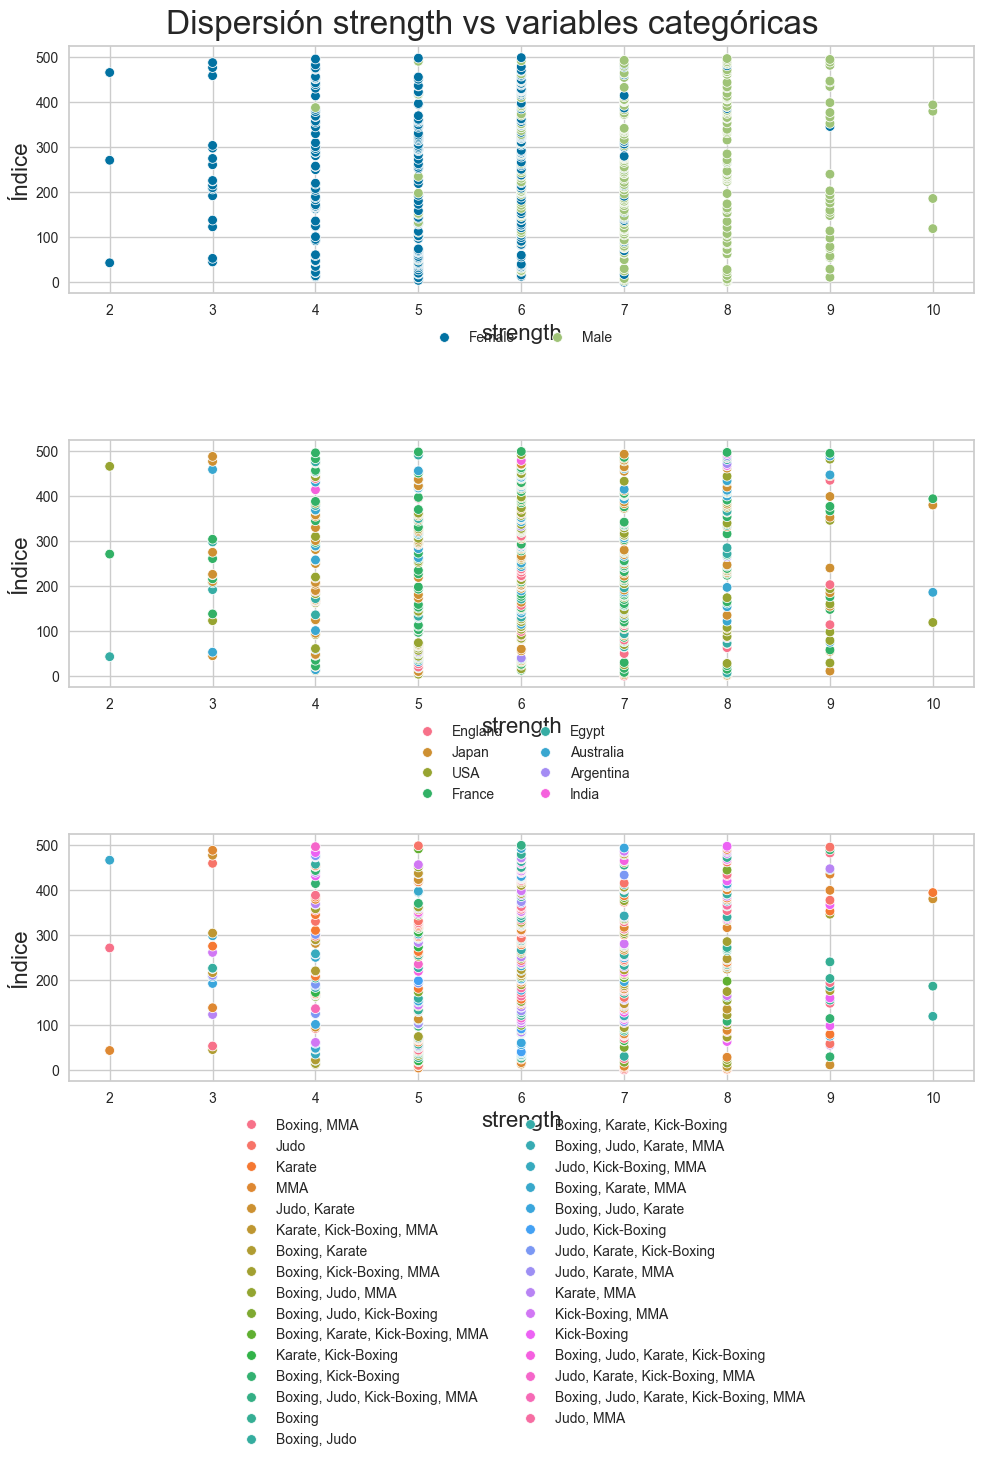

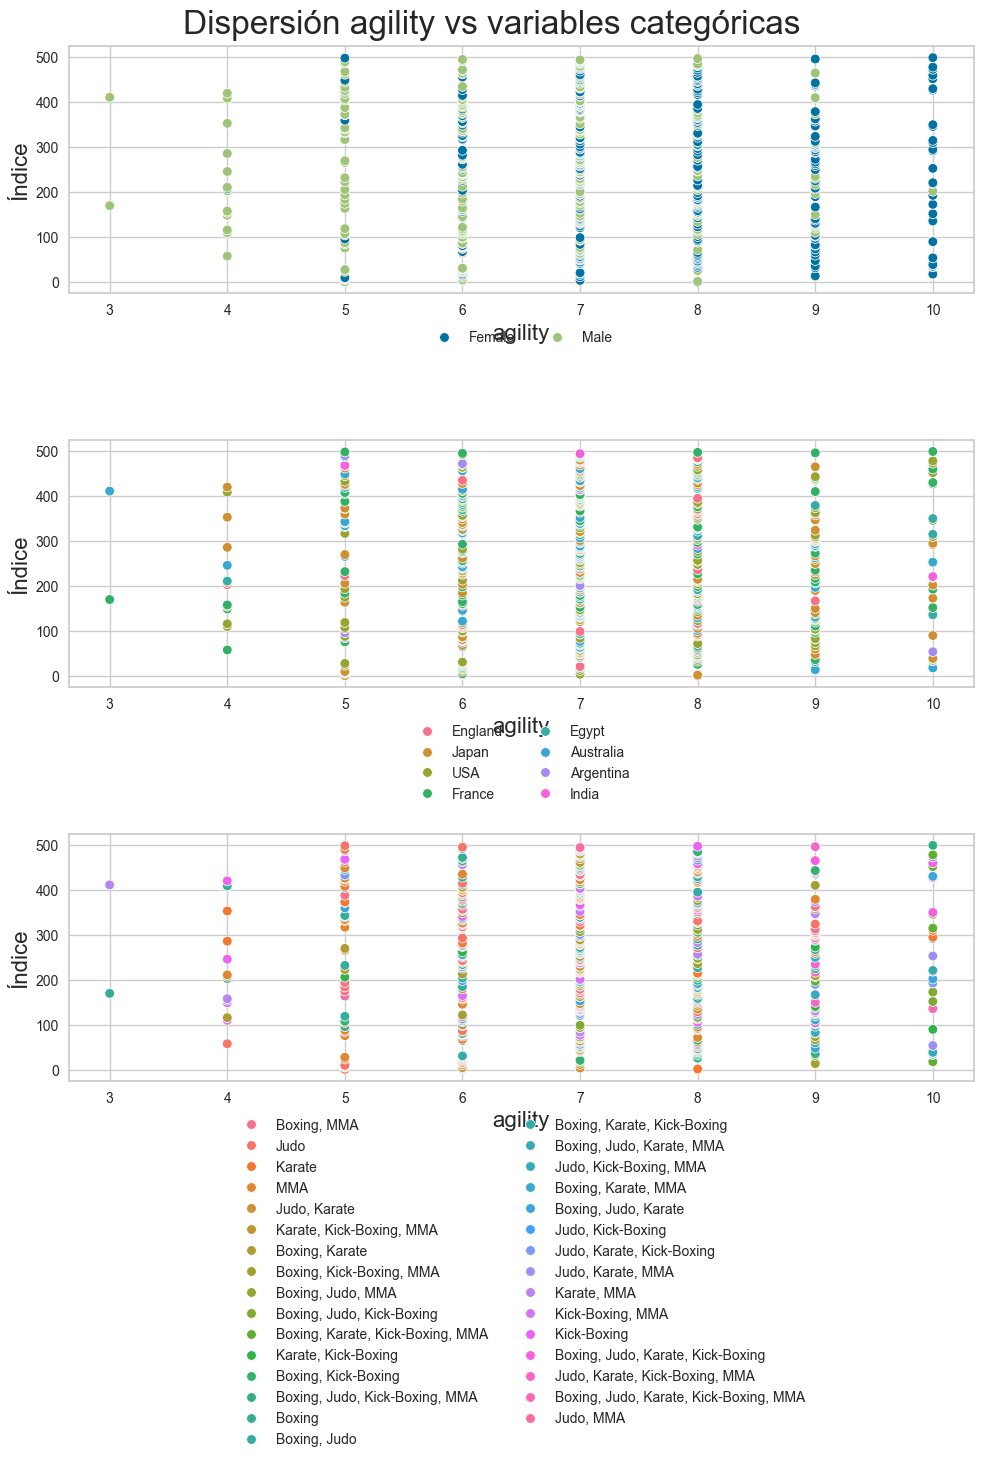

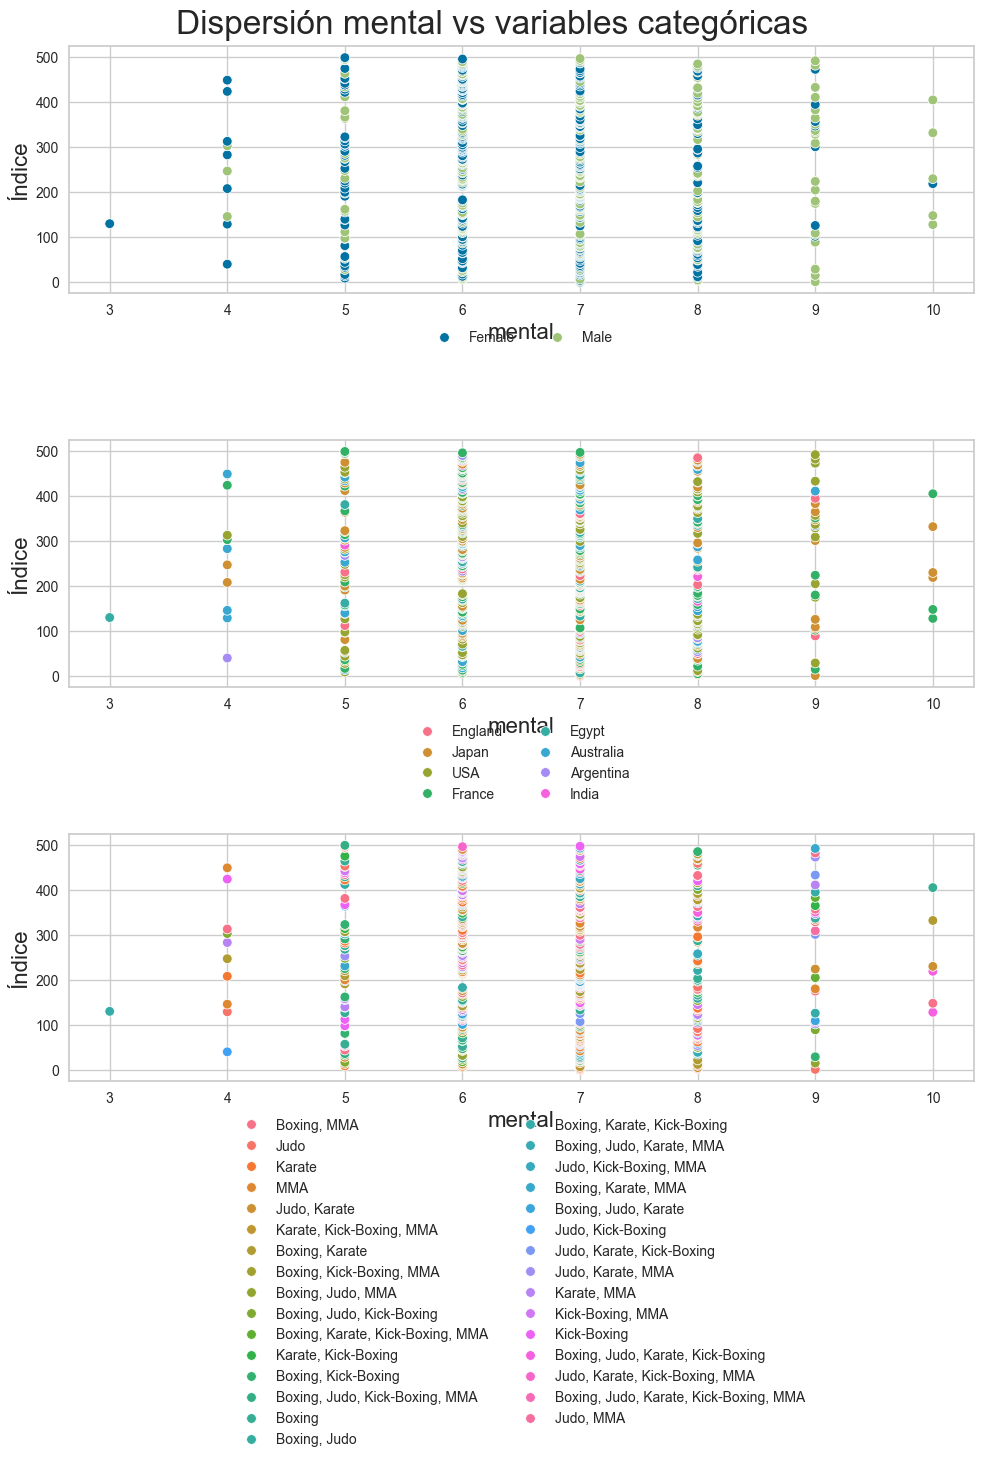

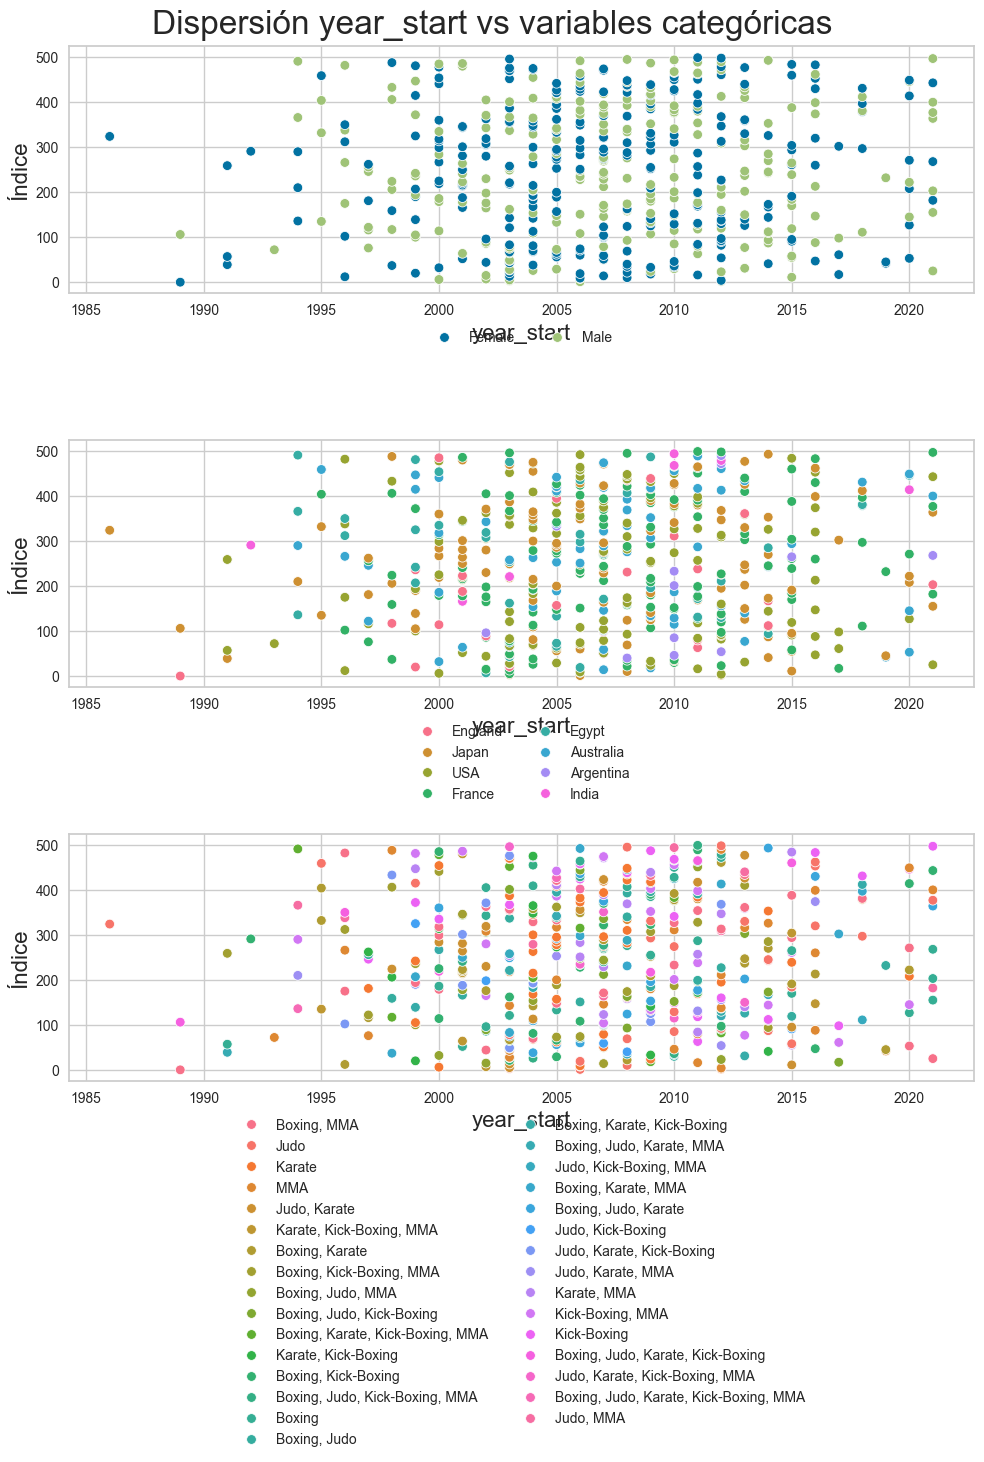

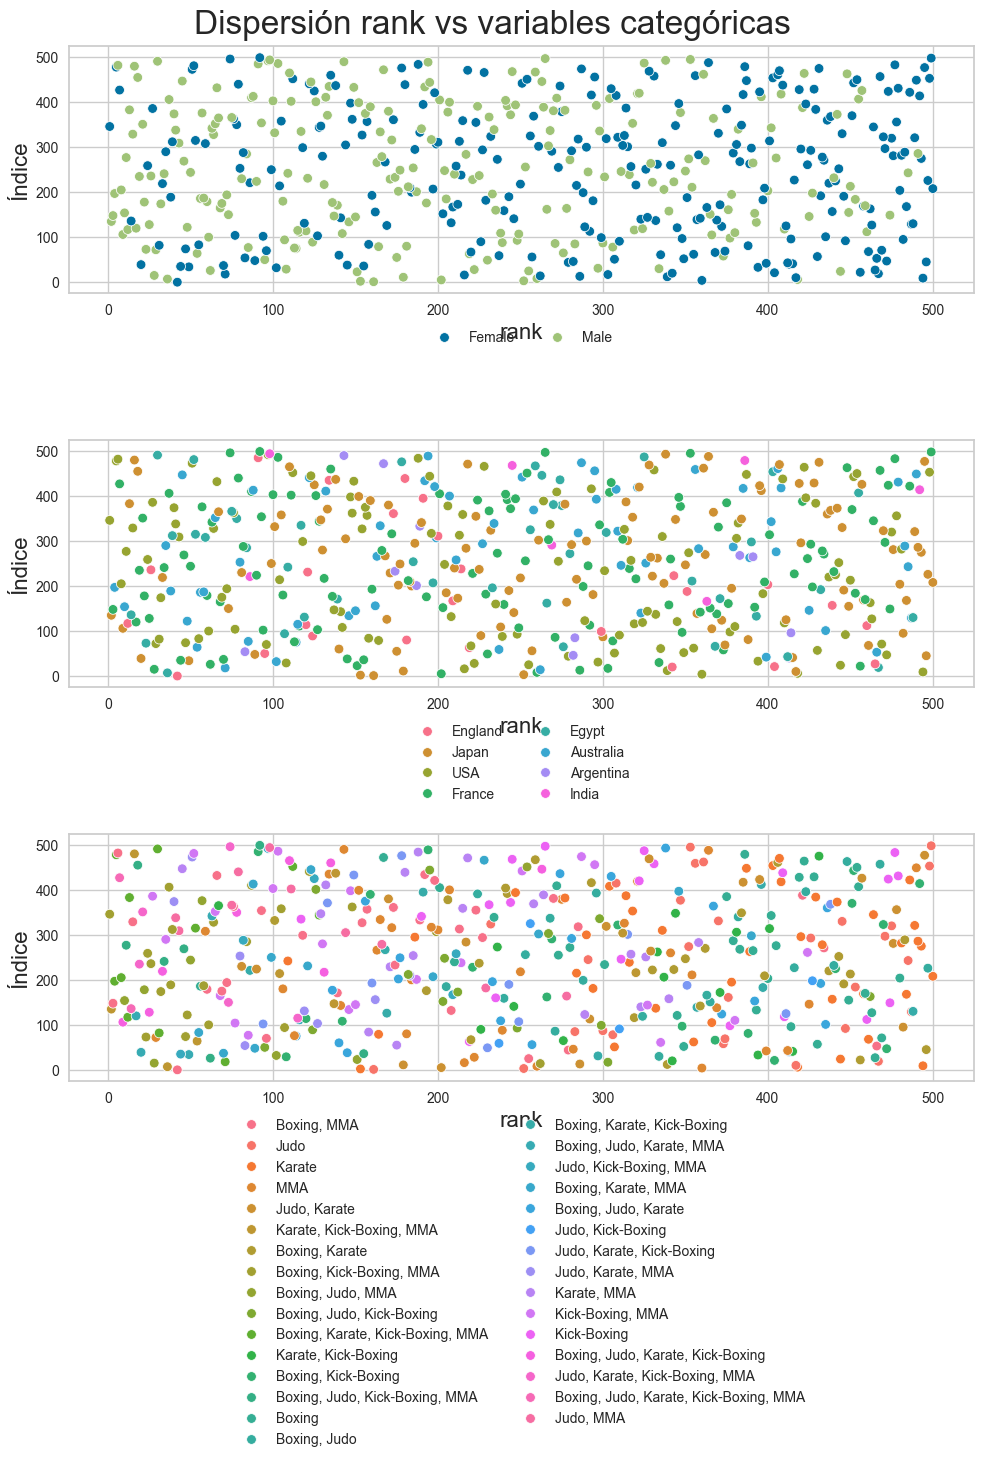

In [48]:
preprocesar.visualizar_categoricas_numericas()

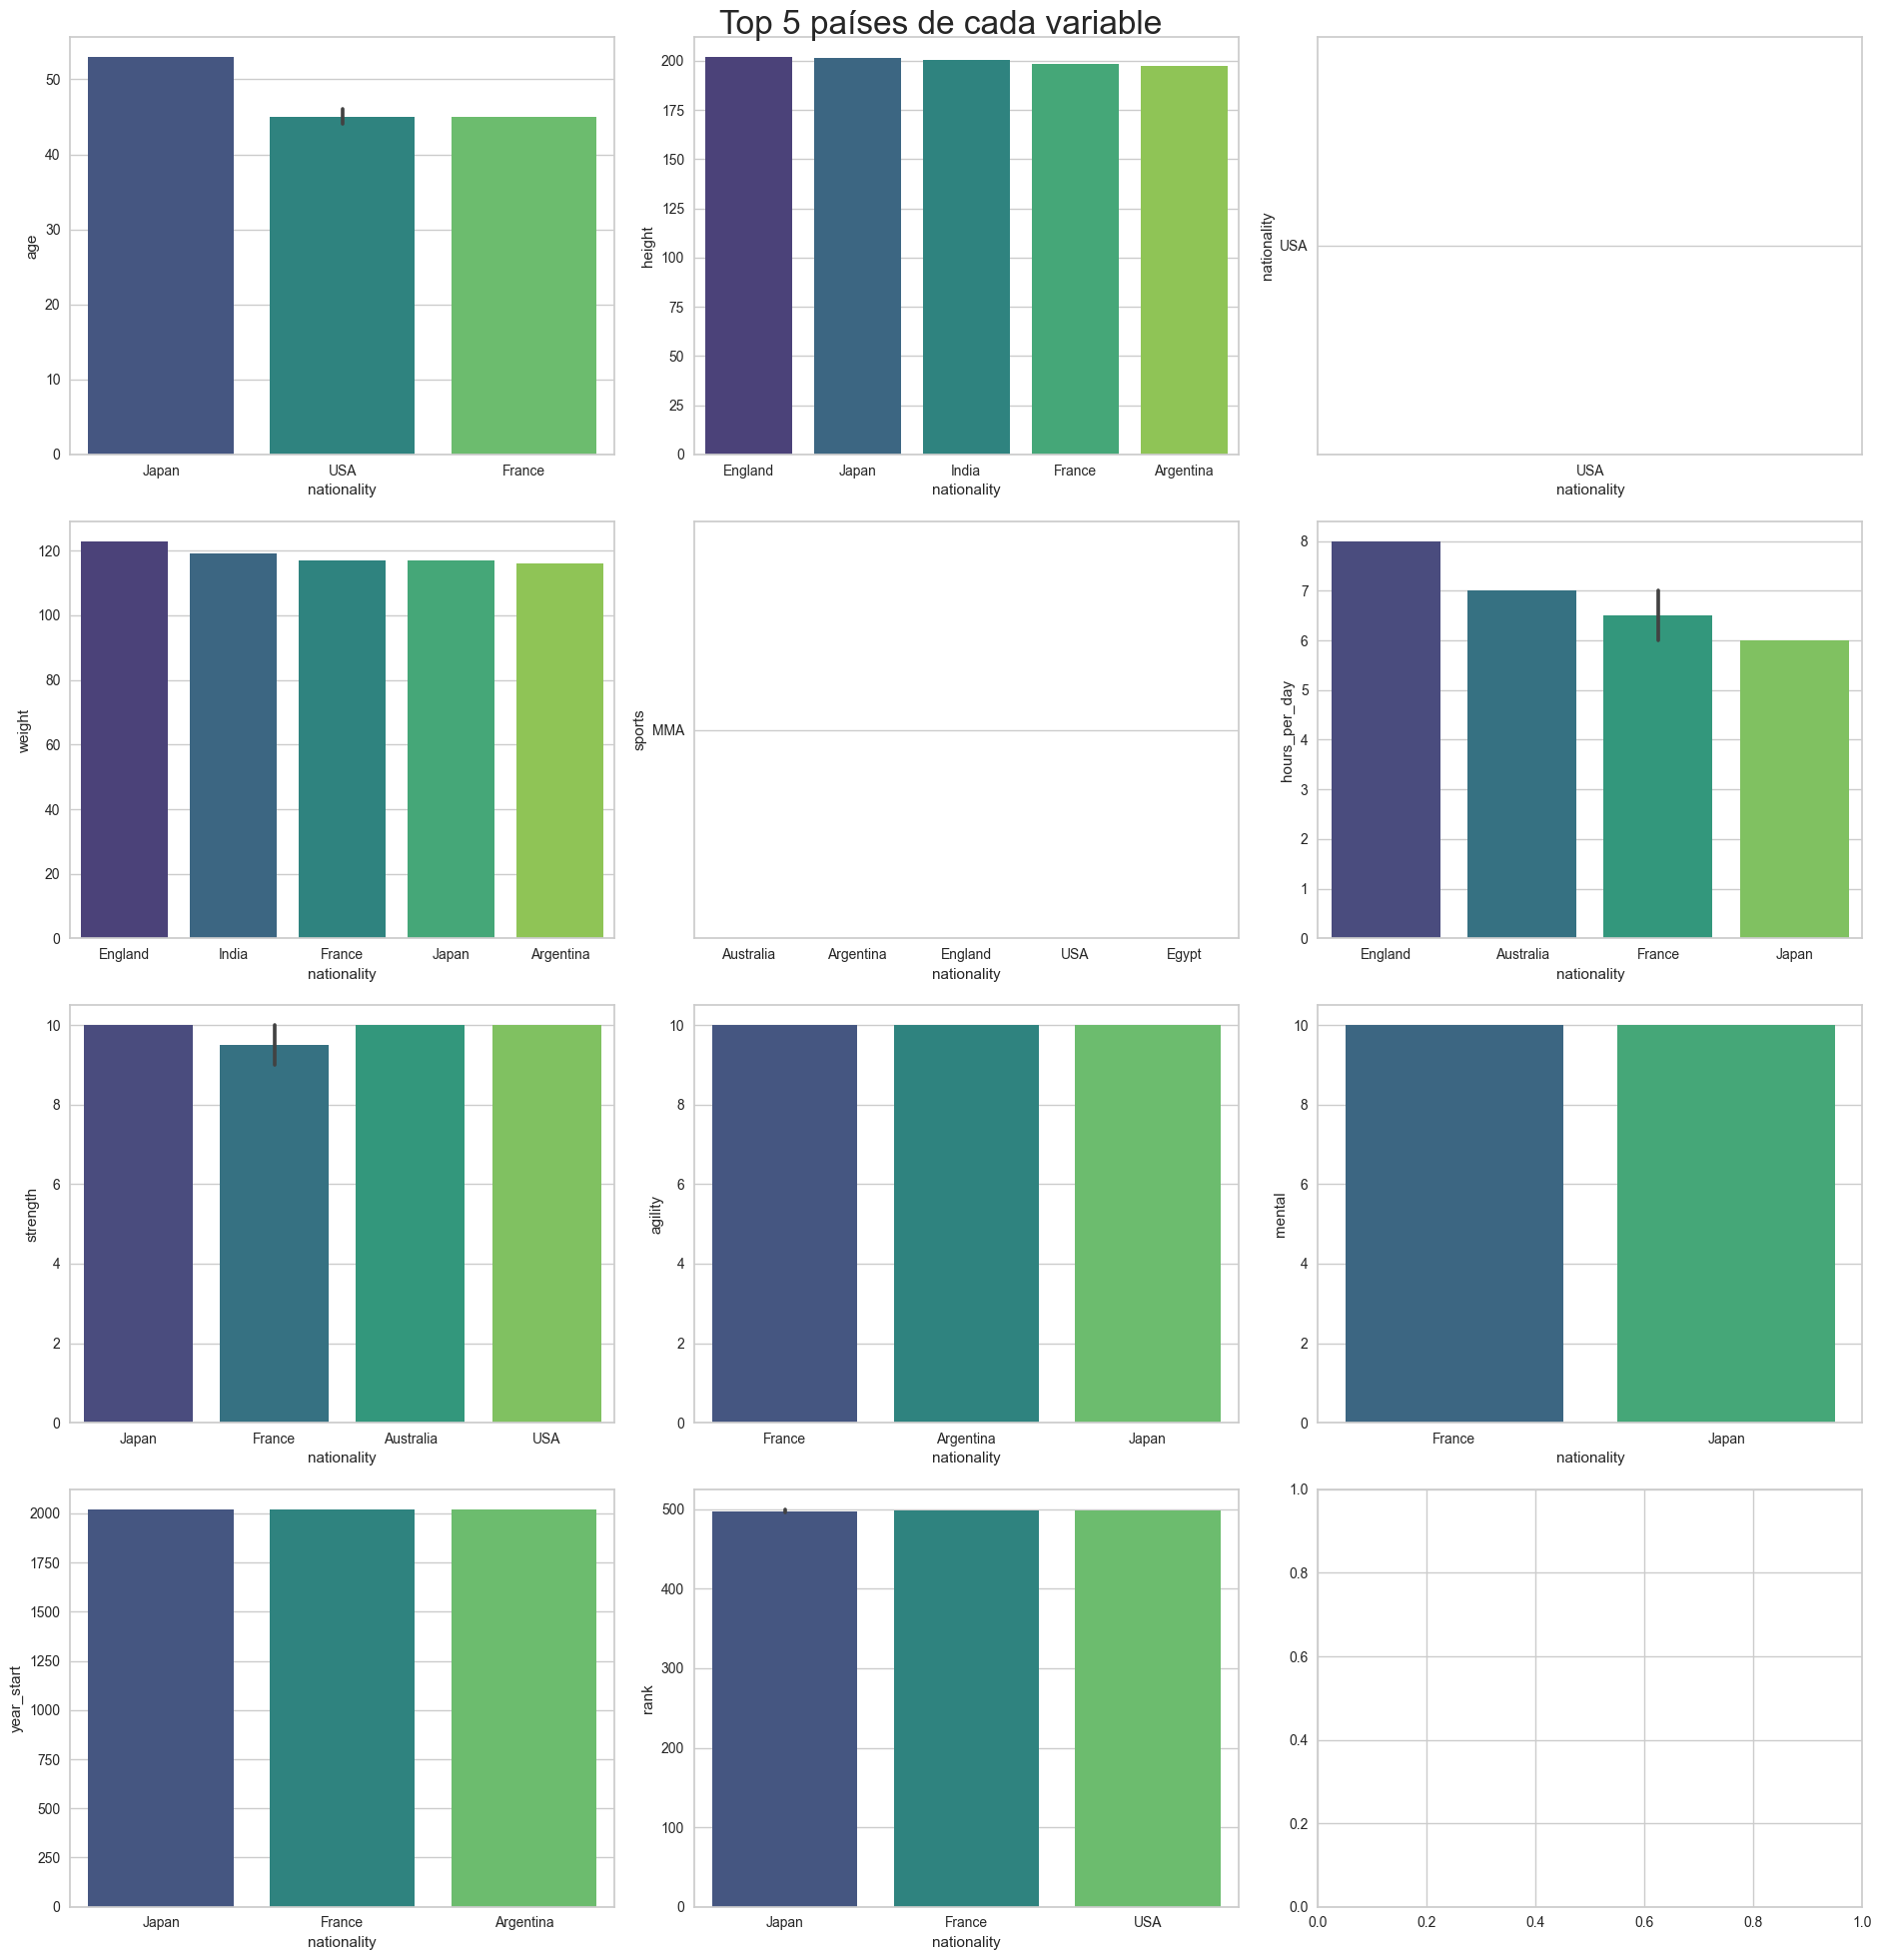

In [49]:
# de forma extraodinaria, vamos a mirar cuales son los países con mejores condiciones para cada una de las columnas categóricas que tenemos en el conjunto de datos
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(19, 20))
axes = axes.flat
columns = df.columns[1:]
plt.suptitle("Top 5 países de cada variable", fontsize=24)
for x, col in enumerate(columns):
    sorted_df = df.sort_values(by=col, ascending=False)
    sns.barplot(x="nationality", y=col, data=sorted_df.head(5), ax=axes[x], palette="viridis")
plt.tight_layout()

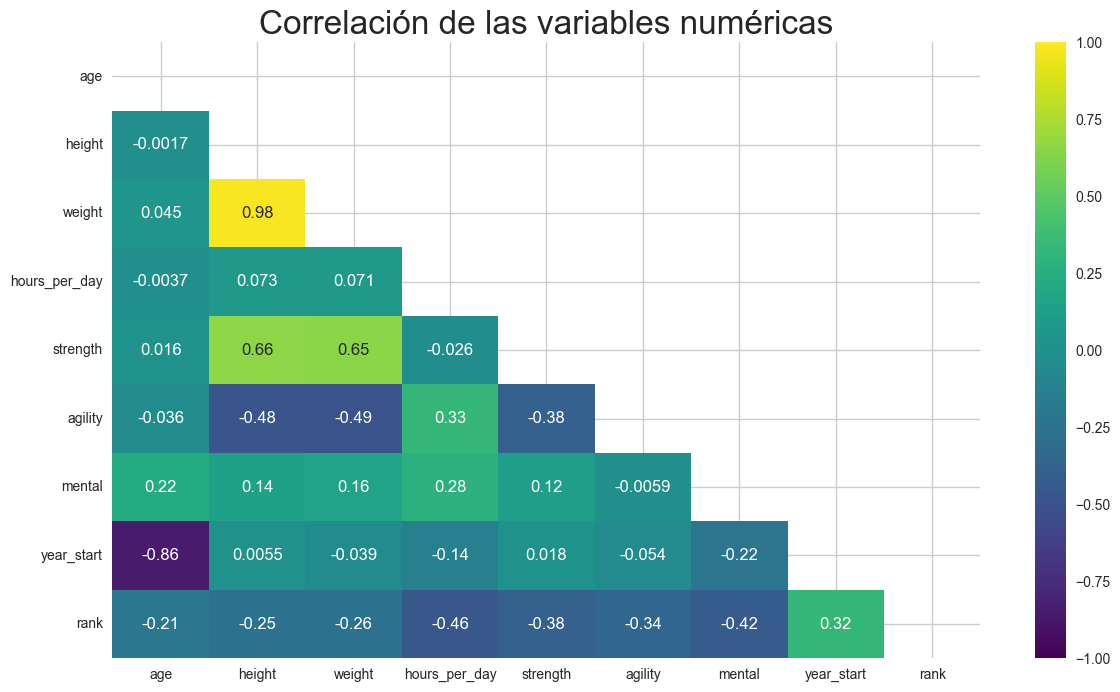

In [50]:
# evaluamos la correlación entre las variables numéricas
preprocesar.correlacion()

In [51]:
preprocesar = sc.Preprocesado(df)

df_estandar = preprocesar.robustscaler()

In [52]:
df_estandar.head()

gender    age    height nationality    weight       sports  hours_per_day  \
0  Female  1.250 -0.637168     England -0.411765  Boxing, MMA            0.0   
1    Male  0.625  0.778761       Japan  0.647059         Judo           -1.5   
2    Male -0.250  0.318584       Japan  0.235294       Karate            0.5   
3    Male  1.000  0.955752       Japan  1.058824         Judo            0.0   
4  Female -0.250 -1.132743         USA -1.000000          MMA           -1.0   

   strength  agility  mental  year_start      rank  
0       0.5      0.5     0.0      -2.250 -0.835671  
1       1.0     -1.0     1.0      -0.125 -0.358717  
2       1.0      0.5     0.0       0.625 -0.390782  
3       0.5     -0.5     0.5      -0.500  0.006012  
4      -0.5      0.0     0.0       0.625  0.438878

In [53]:
df_estandar_frecuencia = preprocesar.codificar()

In [54]:
df_estandar_frecuencia.head()

gender    age    height  nationality    weight  sports  hours_per_day  \
0    0.53  1.250 -0.637168        0.052 -0.411765   0.062            0.0   
1    0.47  0.625  0.778761        0.232  0.647059   0.058           -1.5   
2    0.47 -0.250  0.318584        0.232  0.235294   0.084            0.5   
3    0.47  1.000  0.955752        0.232  1.058824   0.058            0.0   
4    0.53 -0.250 -1.132743        0.230 -1.000000   0.068           -1.0   

   strength  agility  mental  year_start      rank  
0       0.5      0.5     0.0      -2.250 -0.835671  
1       1.0     -1.0     1.0      -0.125 -0.358717  
2       1.0      0.5     0.0       0.625 -0.390782  
3       0.5     -0.5     0.5      -0.500  0.006012  
4      -0.5      0.0     0.0       0.625  0.438878

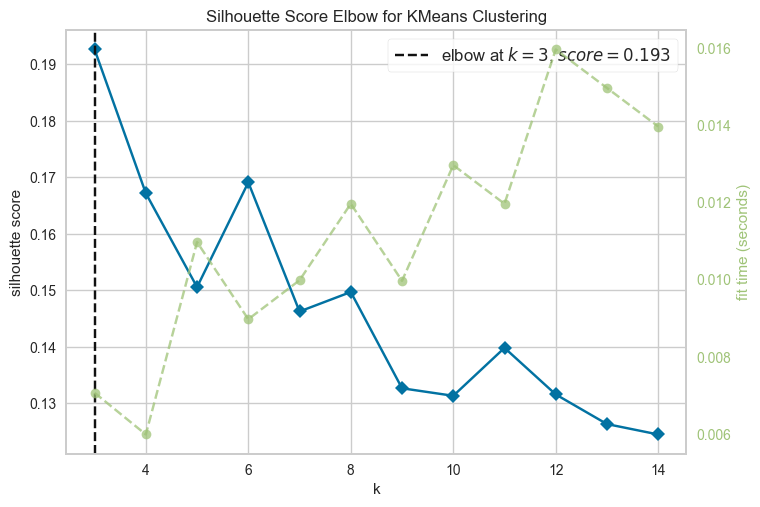

In [55]:
# instanciamos la clase de clustering
modelos = sc.Clustering(df_estandar_frecuencia)

# sacamos el número de clusters óptimos para hacer el Kmeans 
modelos.sacar_clusters_kmeans()

In [56]:
# aplicamos el modelo de Kmeans al dataframe 
df, labels  = modelos.modelo_kmeans(df, 4)

# mostramos el DataFrame
df.head()


gender    age    height  nationality    weight  sports  hours_per_day  \
0    0.53  1.250 -0.637168        0.052 -0.411765   0.062            0.0   
1    0.47  0.625  0.778761        0.232  0.647059   0.058           -1.5   
2    0.47 -0.250  0.318584        0.232  0.235294   0.084            0.5   
3    0.47  1.000  0.955752        0.232  1.058824   0.058            0.0   
4    0.53 -0.250 -1.132743        0.230 -1.000000   0.068           -1.0   

   strength  agility  mental  year_start      rank clusters_kmeans  
0       0.5      0.5     0.0      -2.250 -0.835671               0  
1       1.0     -1.0     1.0      -0.125 -0.358717               2  
2       1.0      0.5     0.0       0.625 -0.390782               3  
3       0.5     -0.5     0.5      -0.500  0.006012               2  
4      -0.5      0.0     0.0       0.625  0.438878               1

In [57]:
modelos.calcular_metricas(labels=labels)

silhouette_score  davies_bouldin_index  cardinalidad
0          0.261771              1.462574           105

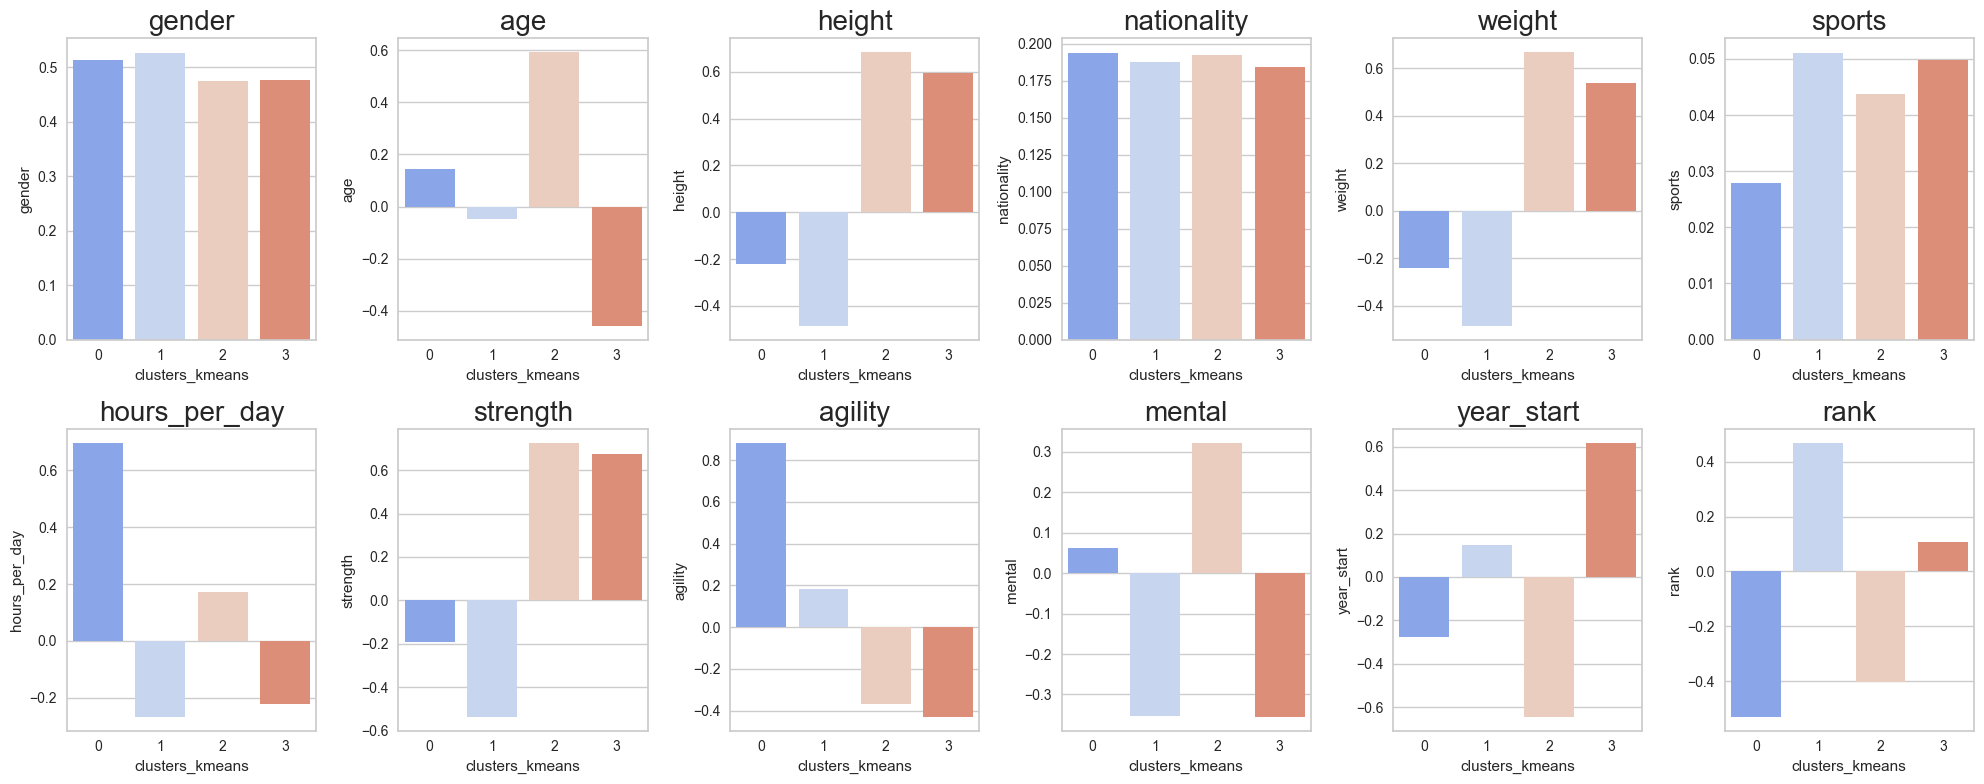

In [58]:
#Eliminar la columna "clusters_kmeans" para el plot
columnas_plot = df.columns.drop("clusters_kmeans")

#Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=math.ceil(len(columnas_plot) / 2), figsize=(20, 8))
axes = axes.flat

for indice, columna in enumerate(columnas_plot):
    df_group = df.groupby("clusters_kmeans")[columna].mean().reset_index()
    sns.barplot(x="clusters_kmeans", y=columna, data=df_group, ax=axes[indice], palette="coolwarm")
    axes[indice].set_title(columna, fontsize=20)

plt.tight_layout()

#Eliminar ejes vacíos si existen
if len(columnas_plot) % 2 != 0:
    fig.delaxes(axes[-1])

plt.show()

### [azul oscuro(0) -  Deportistas con el ranking mas alto]
- gender:   Igualado
- age:  Un poco por encima de la media 
- height: Un poco mas bajo de la media 
- nationality:  Igualado
- weight: Un poco mas bajo de la media 
- sports:   Mas bajo de la media
- hours_per_day: Los que mas entrenan	
- strength:	Fuerza mas bajo de la media
- agility: Los que mas agilidad tienen
- mental: Un poco por encima de la media
- year_start: Un poco mas bajo de la media
- rank: la posicion mas alta.

### [azul claro(1) -  Deportistas con el ranking mas Bajo]
- gender:   Igualado
- age:  Por debajo de la media 
- height: Muy por debajo de la media
- nationality:  Igualado
- weight: Muy por debajo de la media
- sports:   Media mas alta
- hours_per_day: Los que menos entrenan, Muy por debajo de la media
- strength:	Fuerza muy por debajo de la media
- agility: en la media
- mental: Muy por debajo de la media
- year_start: en la media.
- rank: la posicion mas baja.

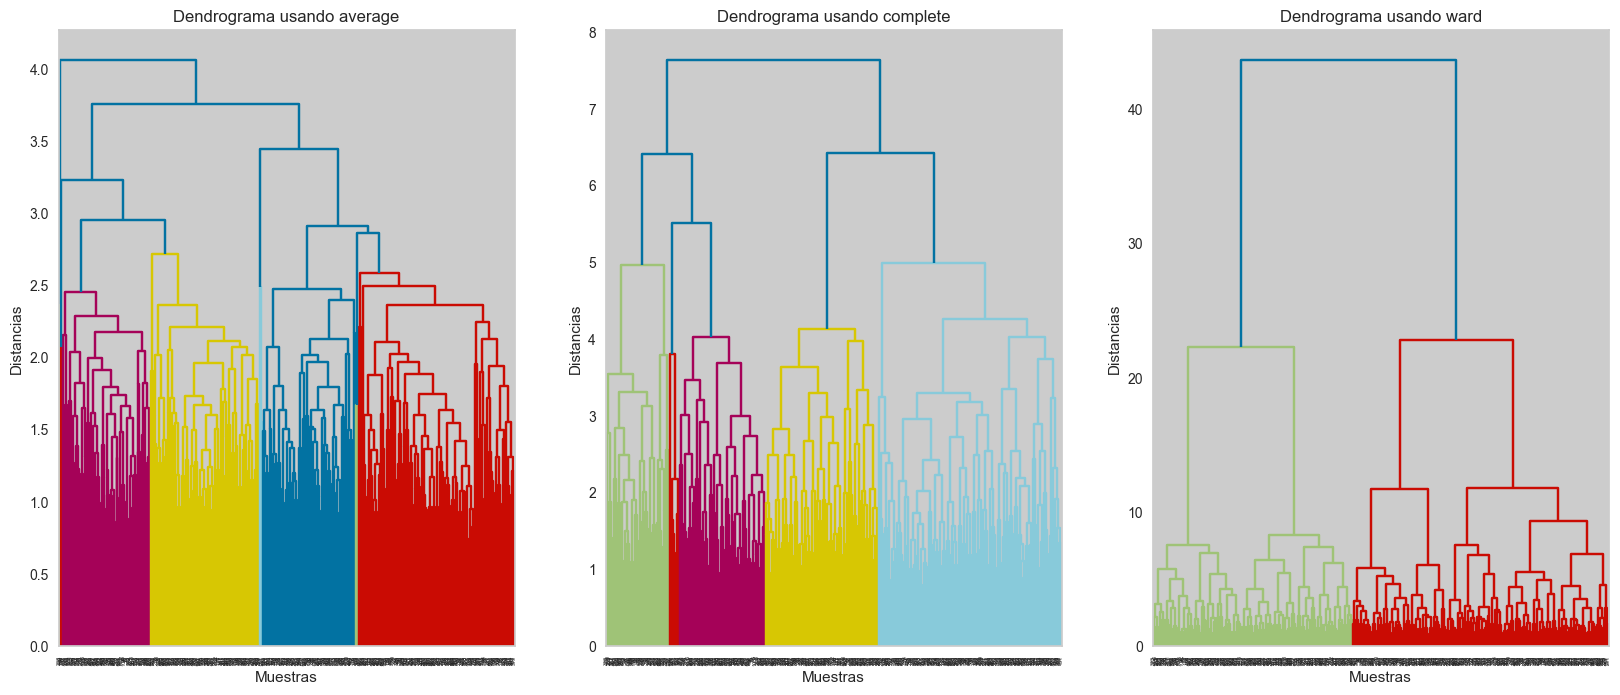

In [59]:
# visualizamos los dendrogramas para saber que método de distancia es el mejor para nuestros datos
modelos.visualizar_dendrogramas()

In [60]:
# Configuraciones de vinculación y métricas de distancia
linkage_methods = ['single', 'complete', 'average', 'ward']
distance_metrics = ['euclidean', 'cosine', 'chebyshev']

# Crear un DataFrame para almacenar los resultados
results = []

# Suponiendo que tienes un DataFrame llamado df_copia
# Aquí df_copia debería ser tu conjunto de datos
# Asegúrate de que esté preprocesado adecuadamente (normalizado si es necesario)

for linkage_method in linkage_methods:
    for metric in distance_metrics:
        for cluster in range(3,10):
            try:
                # Configurar el modelo de AgglomerativeClustering
                modelo = AgglomerativeClustering(
                    linkage=linkage_method,
                    metric=metric,  
                    distance_threshold=None,  # Para buscar n_clusters
                    n_clusters=cluster, # Cambia esto según tu análisis
                )
                
                # Ajustar el modelo
                labels = modelo.fit_predict(df_estandar_frecuencia)

                # Calcular métricas si hay más de un cluster
                if len(np.unique(labels)) > 1:
                    # Silhouette Score
                    silhouette_avg = silhouette_score(df_estandar_frecuencia, labels, metric=metric)

                    # Davies-Bouldin Index
                    db_score = davies_bouldin_score(df_estandar_frecuencia, labels)

                    
                    # Cardinalidad (tamaño de cada cluster)
                    cluster_cardinality = {cluster: sum(labels == cluster) for cluster in np.unique(labels)}
                else:
                    inertia = float('inf')
                    cluster_cardinality = {'Cluster único': len(df_estandar_frecuencia)}

                # Almacenar resultados
                results.append({
                    'linkage': linkage_method,
                    'metric': metric,
                    'silhouette_score': silhouette_avg,
                    'davies_bouldin_index': db_score,
                    'cluster_cardinality': cluster_cardinality,
                    'n_cluster': cluster
                })

            except Exception as e:
                print(f"Error con linkage={linkage_method}, metric={metric}: {e}")

# Crear DataFrame de resultados
results_df = pd.DataFrame(results)

# Mostrar resultados ordenados por silhouette_score
results_df = results_df.sort_values(by='silhouette_score', ascending=False)

# Mostrar el DataFrame
results_df.head(20)

Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=cosine: cosine was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric. Ward can only work with euclidean distances.
Error con linkage=ward, metric=chebyshev: chebyshev was provided as metric

linkage     metric  silhouette_score  davies_bouldin_index  \
49   average     cosine          0.439203              1.458543   
50   average     cosine          0.430927              1.413566   
51   average     cosine          0.393516              1.390657   
29  complete     cosine          0.340861              1.627680   
54   average     cosine          0.338262              1.573072   
55   average     cosine          0.333481              1.701823   
52   average     cosine          0.329059              1.546283   
30  complete     cosine          0.326808              1.737585   
53   average     cosine          0.311198              1.555472   
28  complete     cosine          0.302081              1.636881   
31  complete     cosine          0.287314              1.814035   
32  complete     cosine          0.280331              1.953129   
34  complete     cosine          0.277296              1.875728   
42   average  euclidean          0.275033              1.141307   
33  complete     cosine          0.274310              1.839990   
63      ward  euclidean          0.262993              1.439023   
64      ward  euclidean          0.259591              1.466669   
57   average  chebyshev          0.234613              0.906166   
22  complete  euclidean          0.220335              1.589772   
46   average  euclidean          0.219438              1.222607   

                                  cluster_cardinality  n_cluster  
49                           {0: 109, 1: 173, 2: 218}          3  
50                     {0: 65, 1: 173, 2: 218, 3: 44}          4  
51               {0: 173, 1: 44, 2: 218, 3: 62, 4: 3}          5  
29                    {0: 100, 1: 147, 2: 47, 3: 206}          4  
54  {0: 62, 1: 38, 2: 8, 3: 85, 4: 3, 5: 218, 6: 6...          8  
55  {0: 38, 1: 85, 2: 8, 3: 80, 4: 3, 5: 218, 6: 6...          9  
52         {0: 44, 1: 165, 2: 8, 3: 62, 4: 3, 5: 218}          6  
30              {0: 147, 1: 62, 2: 47, 3: 206, 4: 38}          5  
53   {0: 165, 1: 62, 2: 8, 3: 38, 4: 3, 5: 218, 6: 6}          7  
28                            {0: 353, 1: 100, 2: 47}          3  
31       {0: 62, 1: 104, 2: 47, 3: 206, 4: 38, 5: 43}          6  
32  {0: 104, 1: 206, 2: 47, 3: 39, 4: 38, 5: 43, 6...          7  
34  {0: 206, 1: 39, 2: 78, 3: 36, 4: 38, 5: 43, 6:...          9  
42                             {0: 280, 1: 2, 2: 218}          3  
33  {0: 47, 1: 206, 2: 78, 3: 39, 4: 38, 5: 43, 6:...          8  
63                           {0: 219, 1: 178, 2: 103}          3  
64                    {0: 178, 1: 121, 2: 103, 3: 98}          4  
57                       {0: 282, 1: 216, 2: 1, 3: 1}          4  
22                    {0: 105, 1: 201, 2: 124, 3: 70}          4  
46  {0: 174, 1: 4, 2: 119, 3: 2, 4: 2, 5: 97, 6: 102}          7

In [61]:
# aplicamos el modelo para sacar los clusters
df_modelo_agl = modelos.modelo_aglomerativo(3, "ward", df_estandar_frecuencia)
df_modelo_agl.head()

gender    age    height  nationality    weight  sports  hours_per_day  \
0    0.53  1.250 -0.637168        0.052 -0.411765   0.062            0.0   
1    0.47  0.625  0.778761        0.232  0.647059   0.058           -1.5   
2    0.47 -0.250  0.318584        0.232  0.235294   0.084            0.5   
3    0.47  1.000  0.955752        0.232  1.058824   0.058            0.0   
4    0.53 -0.250 -1.132743        0.230 -1.000000   0.068           -1.0   

   strength  agility  mental  year_start      rank clusters_kmeans  \
0       0.5      0.5     0.0      -2.250 -0.835671               0   
1       1.0     -1.0     1.0      -0.125 -0.358717               2   
2       1.0      0.5     0.0       0.625 -0.390782               3   
3       0.5     -0.5     0.5      -0.500  0.006012               2   
4      -0.5      0.0     0.0       0.625  0.438878               1   

  clusters_agglomerative  
0                      2  
1                      0  
2                      0  
3                      0  
4                      1

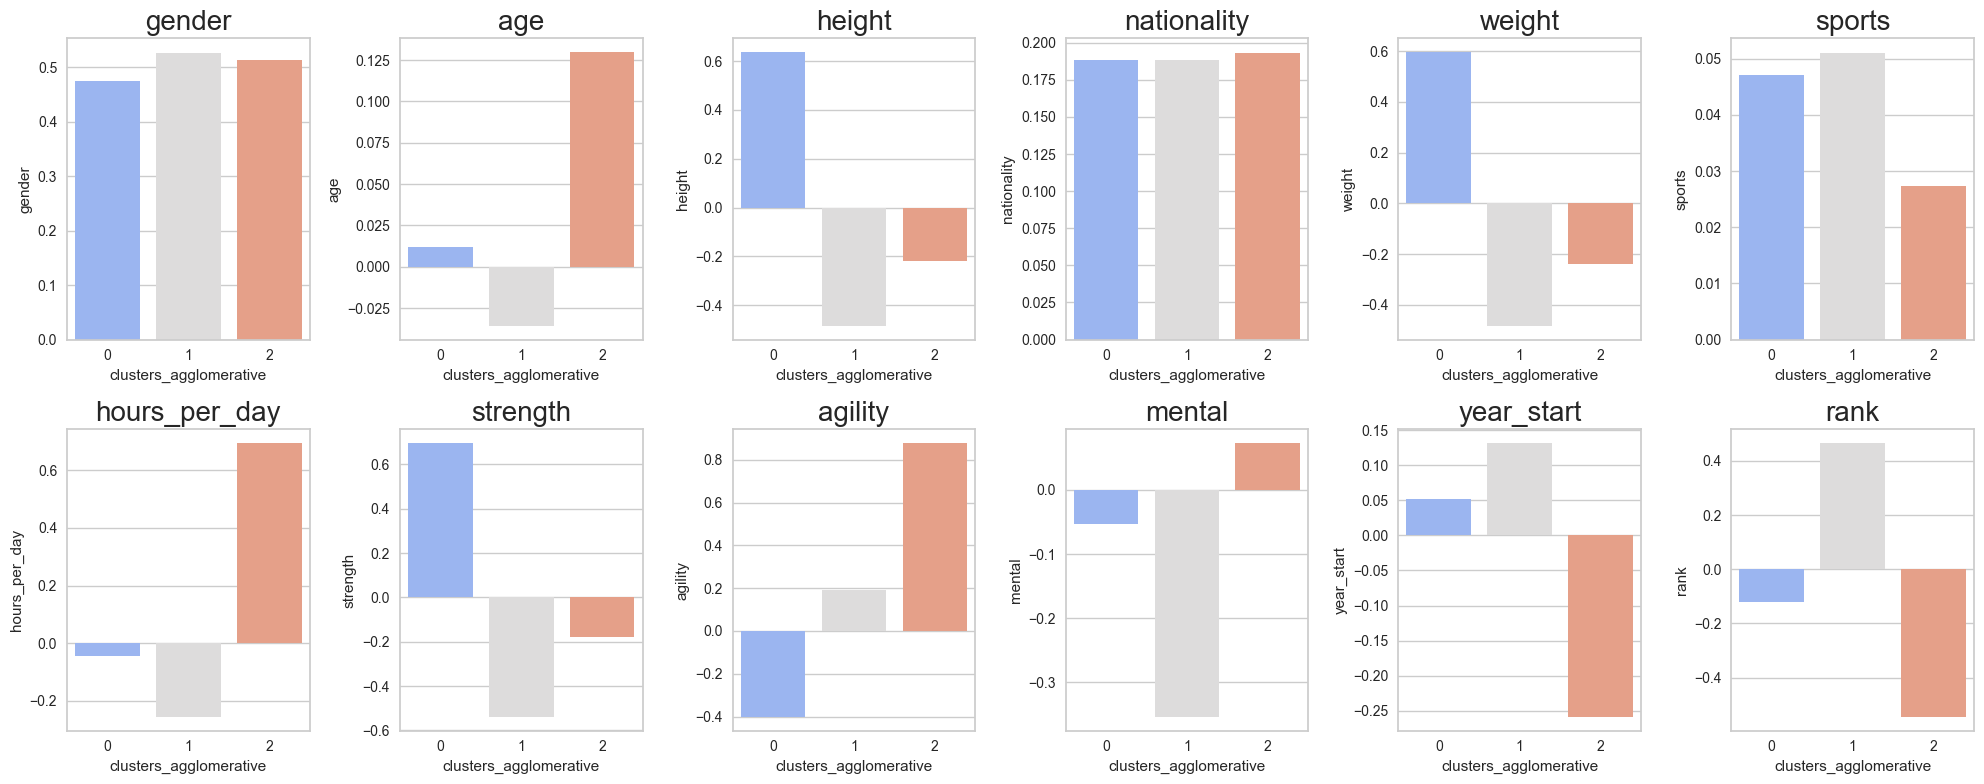

In [62]:
#Eliminar la columna "clusters_kmeans" para el plot
columnas_plot = df_modelo_agl.columns.drop(["clusters_agglomerative","clusters_kmeans"])

#Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=math.ceil(len(columnas_plot) / 2), figsize=(20, 8))
axes = axes.flat

for indice, columna in enumerate(columnas_plot):
    df_group = df_modelo_agl.groupby("clusters_agglomerative")[columna].mean().reset_index()
    sns.barplot(x="clusters_agglomerative", y=columna, data=df_group, ax=axes[indice], palette="coolwarm")
    axes[indice].set_title(columna, fontsize=20)

plt.tight_layout()

#Eliminar ejes vacíos si existen
if len(columnas_plot) % 2 != 0:
    fig.delaxes(axes[-1])

plt.show()

### [rojo(2) -  Deportistas con el ranking mas alto]
- gender:   Igualado
- age:  Un poco por encima de la media 
- height: Mas bajo de la media
- nationality:  Igualado
- weight: Mas bajo de la media
- sports:   Mas bajo de la media
- hours_per_day: Los que mas entrenan	
- strength:	Fuerza mas bajo de la media
- agility: Los que mas agilidad tienen
- mental: los que mejor media tenien
- year_start: Empezarmos antes
- rank: la posicion mas alta.

### [gris(1) -  Deportistas con el ranking mas Bajo]
- gender:   Igualado
- age:  Por debajo de la media 
- height: Muy por debajo de la media
- nationality:  Igualado
- weight: Muy por debajo de la media
- sports:   Media mas alta
- hours_per_day: Los que menos entrenan, Muy por debajo de la media
- strength:	Fuerza muy por debajo de la media
- agility: en la media
- mental: muy por debajo de la media
- year_start: los que menos años llevan.
- rank: la posicion mas baja.

In [63]:
# instanciamos la clase de clustering porque tenemos otro conjunto de datos
modelos = sc.Clustering(df_modelo_agl)

# llamamos al método de dbscan
df_dbscan = modelos.modelo_dbscan(dataframe_original=df_modelo_agl)
df_dbscan.head()

eps: 0.5, min_samples: 10, silhouette: -1
eps: 0.5, min_samples: 5, silhouette: -1
eps: 0.5, min_samples: 3, silhouette: -1
eps: 1.0, min_samples: 10, silhouette: -0.20833484655912093
eps: 1.0, min_samples: 5, silhouette: -0.14402542219978745
eps: 1.0, min_samples: 3, silhouette: -0.13656307724218172
eps: 1.5, min_samples: 10, silhouette: 0.2945677368476155
eps: 1.5, min_samples: 5, silhouette: 0.2973733934292853
eps: 1.5, min_samples: 3, silhouette: 0.29905939972001144


gender    age    height  nationality    weight  sports  hours_per_day  \
0    0.53  1.250 -0.637168        0.052 -0.411765   0.062            0.0   
1    0.47  0.625  0.778761        0.232  0.647059   0.058           -1.5   
2    0.47 -0.250  0.318584        0.232  0.235294   0.084            0.5   
3    0.47  1.000  0.955752        0.232  1.058824   0.058            0.0   
4    0.53 -0.250 -1.132743        0.230 -1.000000   0.068           -1.0   

   strength  agility  mental  year_start      rank clusters_kmeans  \
0       0.5      0.5     0.0      -2.250 -0.835671               0   
1       1.0     -1.0     1.0      -0.125 -0.358717               2   
2       1.0      0.5     0.0       0.625 -0.390782               3   
3       0.5     -0.5     0.5      -0.500  0.006012               2   
4      -0.5      0.0     0.0       0.625  0.438878               1   

  clusters_agglomerative  clusters_dbscan  
0                      2                0  
1                      0                1  
2                      0                1  
3                      0                1  
4                      1                2

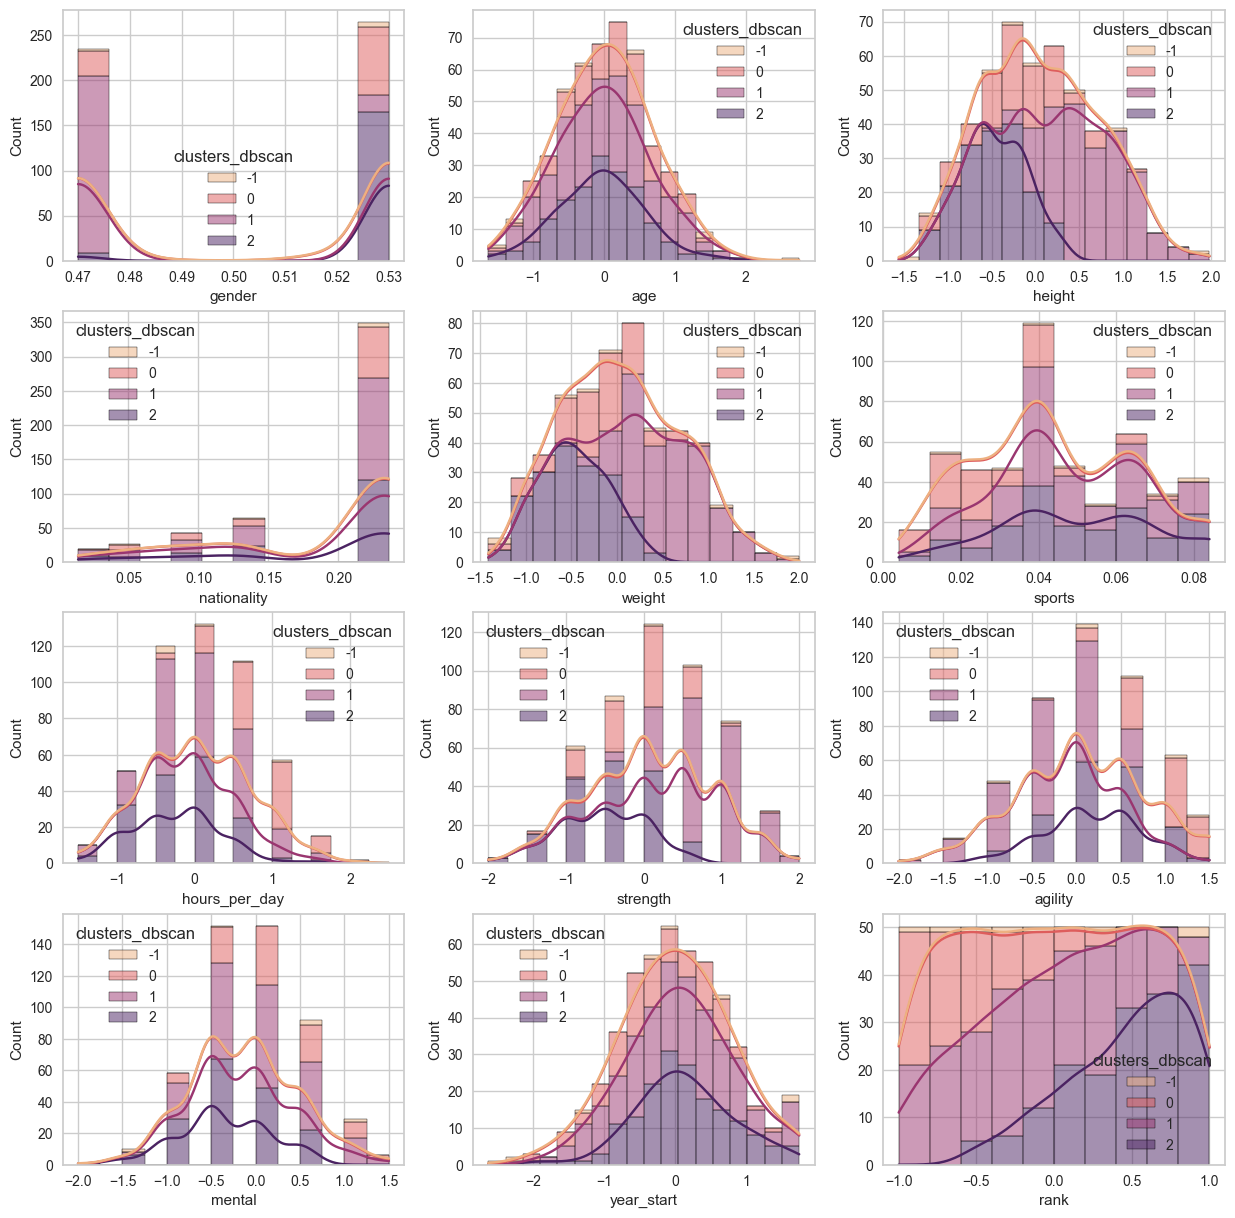

In [64]:
# analicemos los clusters

variables = df_dbscan.columns.to_list()
variables.remove("clusters_kmeans")
variables.remove("clusters_agglomerative")
variables.remove("clusters_dbscan")

fig, axes = plt.subplots(ncols=3, nrows = 4, figsize = (15, 15))
axes = axes.flat

for indice, columna in enumerate(variables):
    sns.histplot(data=df_dbscan, 
                 x=columna, 
                 hue='clusters_dbscan', 
                 kde=True, 
                 multiple='stack', 
                 ax = axes[indice], 
                 palette = "flare")


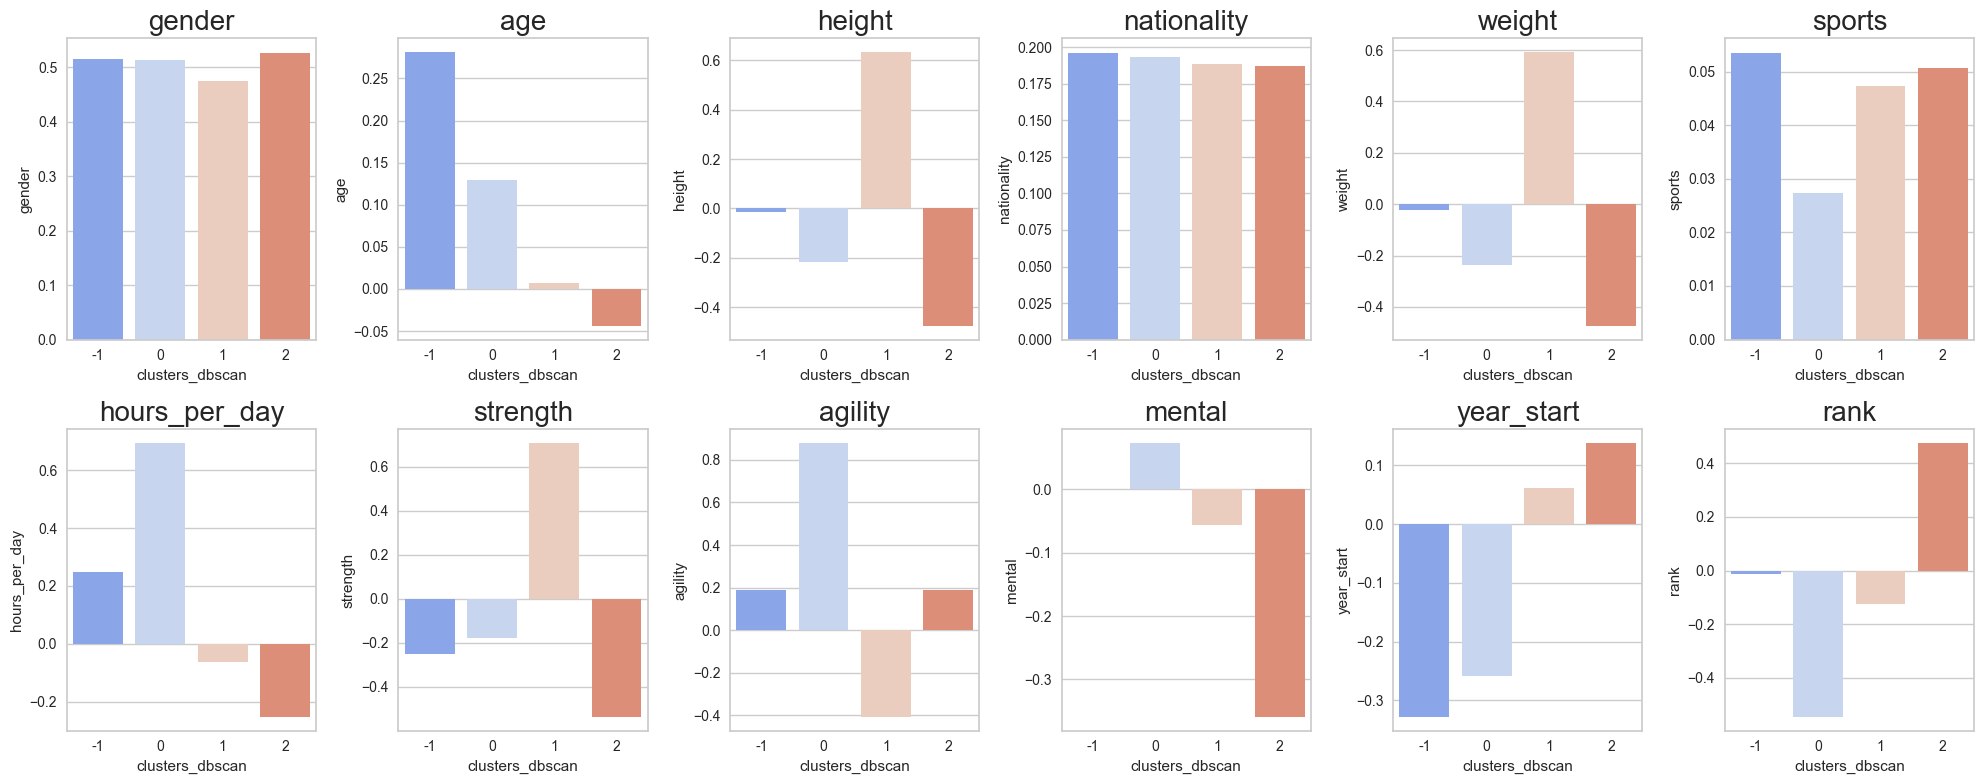

In [65]:
#Eliminar la columna "clusters_kmeans" para el plot
columnas_plot = df_modelo_agl.columns.drop(["clusters_agglomerative","clusters_kmeans","clusters_dbscan"])

#Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=math.ceil(len(columnas_plot) / 2), figsize=(20, 8))
axes = axes.flat

for indice, columna in enumerate(columnas_plot):
    df_group = df_modelo_agl.groupby("clusters_dbscan")[columna].mean().reset_index()
    sns.barplot(x="clusters_dbscan", y=columna, data=df_group, ax=axes[indice], palette="coolwarm")
    axes[indice].set_title(columna, fontsize=20)

plt.tight_layout()

#Eliminar ejes vacíos si existen
if len(columnas_plot) % 2 != 0:
    fig.delaxes(axes[-1])

plt.show()

### [Azul Claro(0) -  Deportistas con el ranking mas alto]
- gender:   Igualado
- age:  Un poco por encima de la media 
- height: Mas bajo de la media
- nationality:  Igualado
- weight: Mas bajo de la media
- sports:   Mas bajo de la media
- hours_per_day: Los que mas entrenan	
- strength:	Fuerza mas bajo de la media
- agility: Los que mas agilidad tienen
- mental: los que mejor media tenien
- year_start: Empezarmos antes
- rank: la posicion mas alta.

### [Rojo(2) -  Deportistas con el ranking mas Bajo]
- gender:   Igualado
- age:  Por debajo de la media 
- height: Muy por debajo de la media
- nationality:  Igualado
- weight: Muy por debajo de la media
- sports:   Media mas alta
- hours_per_day: Los que menos entrenan, Muy por debajo de la media
- strength:	Fuerza muy por debajo de la media
- agility: en la media
- mental: muy por debajo de la media
- year_start: los que menos años llevan.
- rank: la posicion mas baja.